# ***Predict Customer Clicked Ads Classification By Using Machine Learning***

A company in Indonesia wants to know the effectiveness of an advertisement they have been airing. This is important for the company to understand the reach of the advertisement they are marketing so that they can attract customers to watch the advertisement. By processing historical advertisement data and discovering insights and patterns that occur, it can help the company in determining marketing targets. The focus of this case is to create a machine learning classification model that functions to determine the right target customers.

This data set contains the following features:

1. `Unamed: 0` : An index column
2. `Daily Time Spent on Site`: consumer time on site in minutes
3. `Age`: cutomer age in years
4. `Area Income`: Avg. Income of geographical area of consumer
5. `Daily Internet Usage`: Avg. minutes a day consumer is on the internet
6. `Gender` : The represents of consumer gender
7. `Timestamp`: Time at which consumer clicked on Ad or closed window
8. `Clicked on Ad`: 0 or 1 indicated clicking on Ad
9. `City`: City of consumer
10. `Province` : The Province of cunsumer lives
11. `Category`: The category of the advertisement







### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import yellowbrick

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  2.0.3
seaborn version :  0.13.1


### Load Dataset

In [ ]:
df = pd.read_csv('Clicked Ads Dataset.csv')

## Task 1 : Customer Type And Behaviour Analysis On Advertisement


1. Exporatory Data Analysis (EDA)
2. Univariate analysis
3. Bivariate Analysis
4. Multivariate Analysis
5. Visualizations


In [ ]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
# Copy the original Dataframe
dfg = df.copy()

# Rename the columns
col_rename = {'Male':'Gender',
              'city' : 'City',
              'province' : 'Province',
              'category' : 'Category'
}
dfg.rename(columns=col_rename, inplace=True)

In [ ]:
dfg.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,City,Province,Category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


### Exporatory Data Analysis (EDA)

In [ ]:
dfg.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Gender                    997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   City                      1000 non-null   object 
 9   Province                  1000 non-null   object 
 10  Category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


Based on dataframe information, here is a summary of the key observations:
1. The dataset had 1000 rows and 11 columns
2. The dataset has 6 categoric and 5 numeric features.
3. There are missing values in `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, and `Gender`.

#### Statistical Summary

In [ ]:
# Separate the numeric columns and categorical columns
nums = dfg.select_dtypes(['int64', 'float64'])
print("Numerical Colums : ")
display(nums.describe().T)

cats = dfg.select_dtypes(['object'])
print("Categorical Colums : ")
display(cats.describe().T)

Numerical Colums : 


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


Categorical Colums : 


,count,unique,top,freq
Gender,997,2,Perempuan,518
Timestamp,1000,997,5/26/2016 15:40,2
Clicked on Ad,1000,2,No,500
City,1000,30,Surabaya,64
Province,1000,16,Daerah Khusus Ibukota Jakarta,253
Category,1000,10,Otomotif,112


Based on statistical summary of the Numerical columns and Categorical Columns , here is a summary of the key observations:
Numerical Columns:

1. Most features are normally distributed.
2.` Daily Time Spent on Site`: The minimum time spent on the site is 32.60 minutes, while the maximum is 91.43 minutes.
3. `Age`: The minimum customer age is 19 years old, with an average age of 36 years old and a maximum age of 61 years old.

Categorical Columns:

1. `Gender`: The majority of customers are women, with a frequency of 518.
2. `City`: Surabaya is the top city of residence for customers.
3. `Province`: The province with the most customers has a frequency of 253.
4. `Category`: The most clicked ad category is Otomotif, with a frequency of 112.
5. `Clicked on Ad`: The distribution of customers who clicked on an ad is normal.



#### Check Missing Values

Number of missing values per column:


Daily Time Spent on Site    13
Area Income                 13
Daily Internet Usage        11
Gender                       3
dtype: int64


Percentage of missing values per column:
Unnamed: 0                  0.0
Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Timestamp                   0.0
Clicked on Ad               0.0
City                        0.0
Province                    0.0
Category                    0.0
dtype: float64

Variables with missing rates > 10%:
Index([], dtype='object')


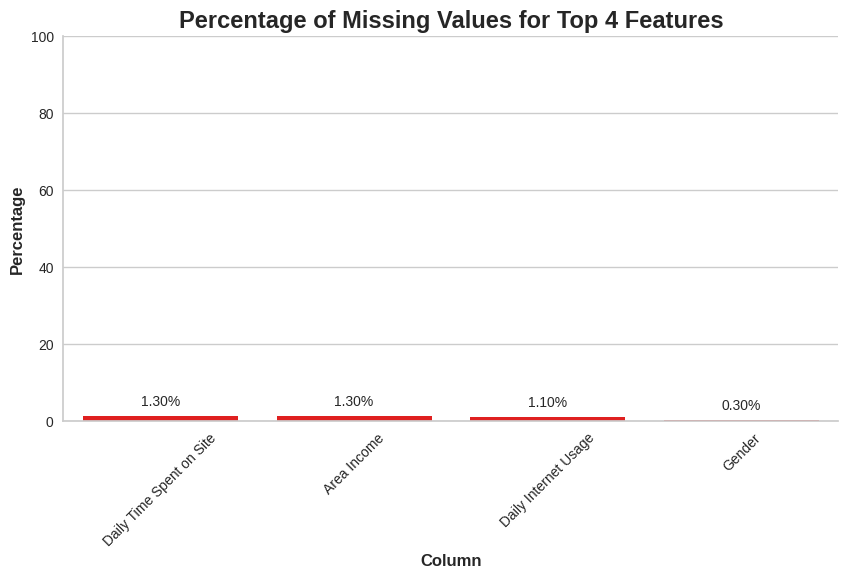

In [ ]:
# Check for missing values in each column
print("Number of missing values per column:")
dfg_missing = dfg.isna().sum()
missing_dfg = dfg_missing[dfg_missing > 0]
display(missing_dfg)

# Check the percentage of missing values
missing_percentages = (dfg.isna().sum() / len(dfg)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentages)

# Identify variables with high missing rates (> 10%)
high_missing_vars = missing_percentages[missing_percentages > 10].index
print("\nVariables with missing rates > 10%:")
print(high_missing_vars)

# Sort the missing percentages in descending order and select the top 4
top_missing = missing_percentages.sort_values(ascending=False).head(4)

# Visualize the missing data for the top 4 features
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_missing.index, y=top_missing.values, color='red')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f%%' % p.get_height(), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Set plot title and axis labels
plt.title('Percentage of Missing Values for Top 4 Features', fontsize=17, fontweight='bold')
sns.despine()
plt.xlabel('Column', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

#### Duplicated Values

In [ ]:
# Checking Duplicate Values
dfg.duplicated().sum()

0

There are no duplicate values detected in the dataset.

### Univariate Analysis

#### Cats Column

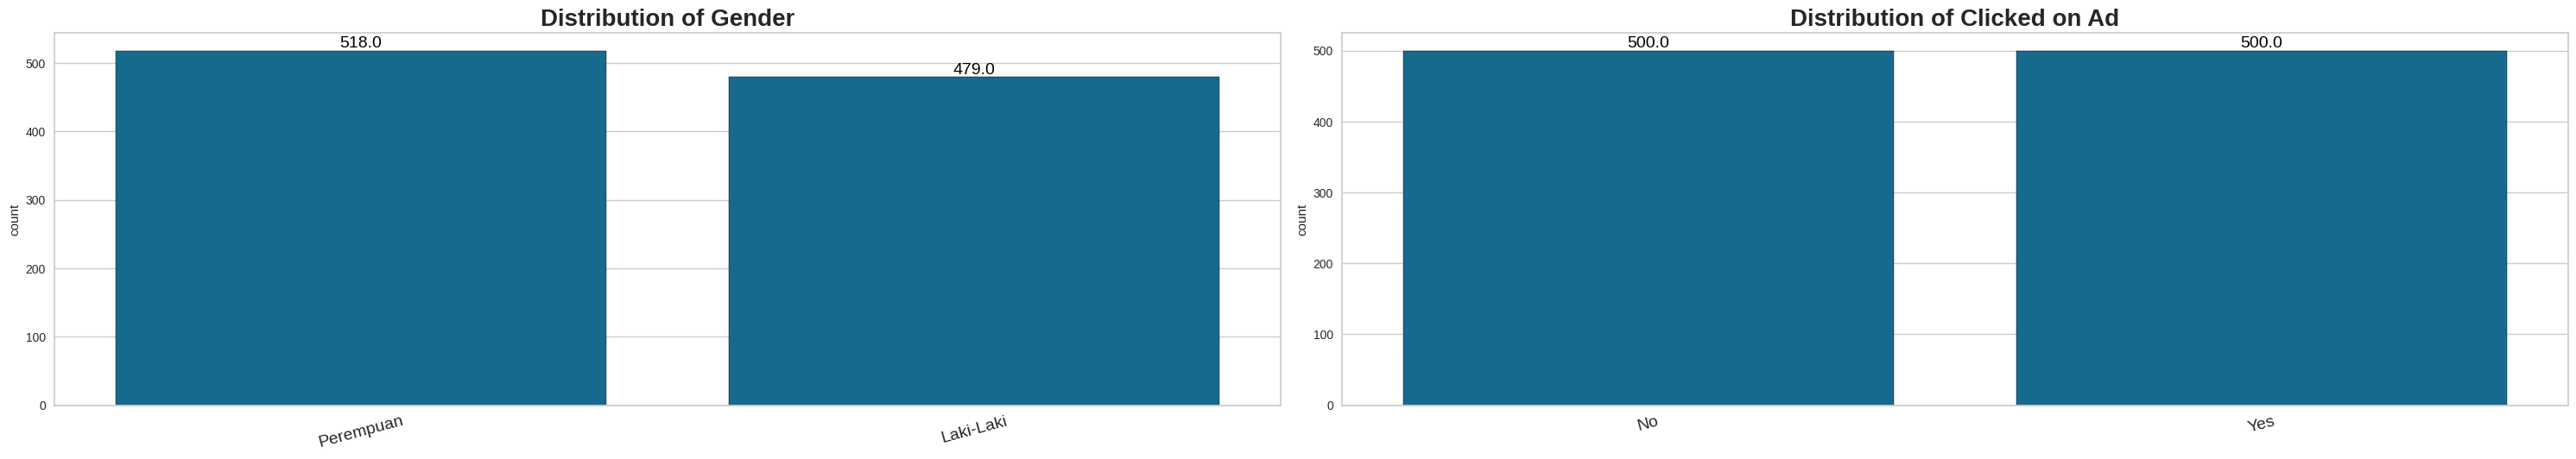

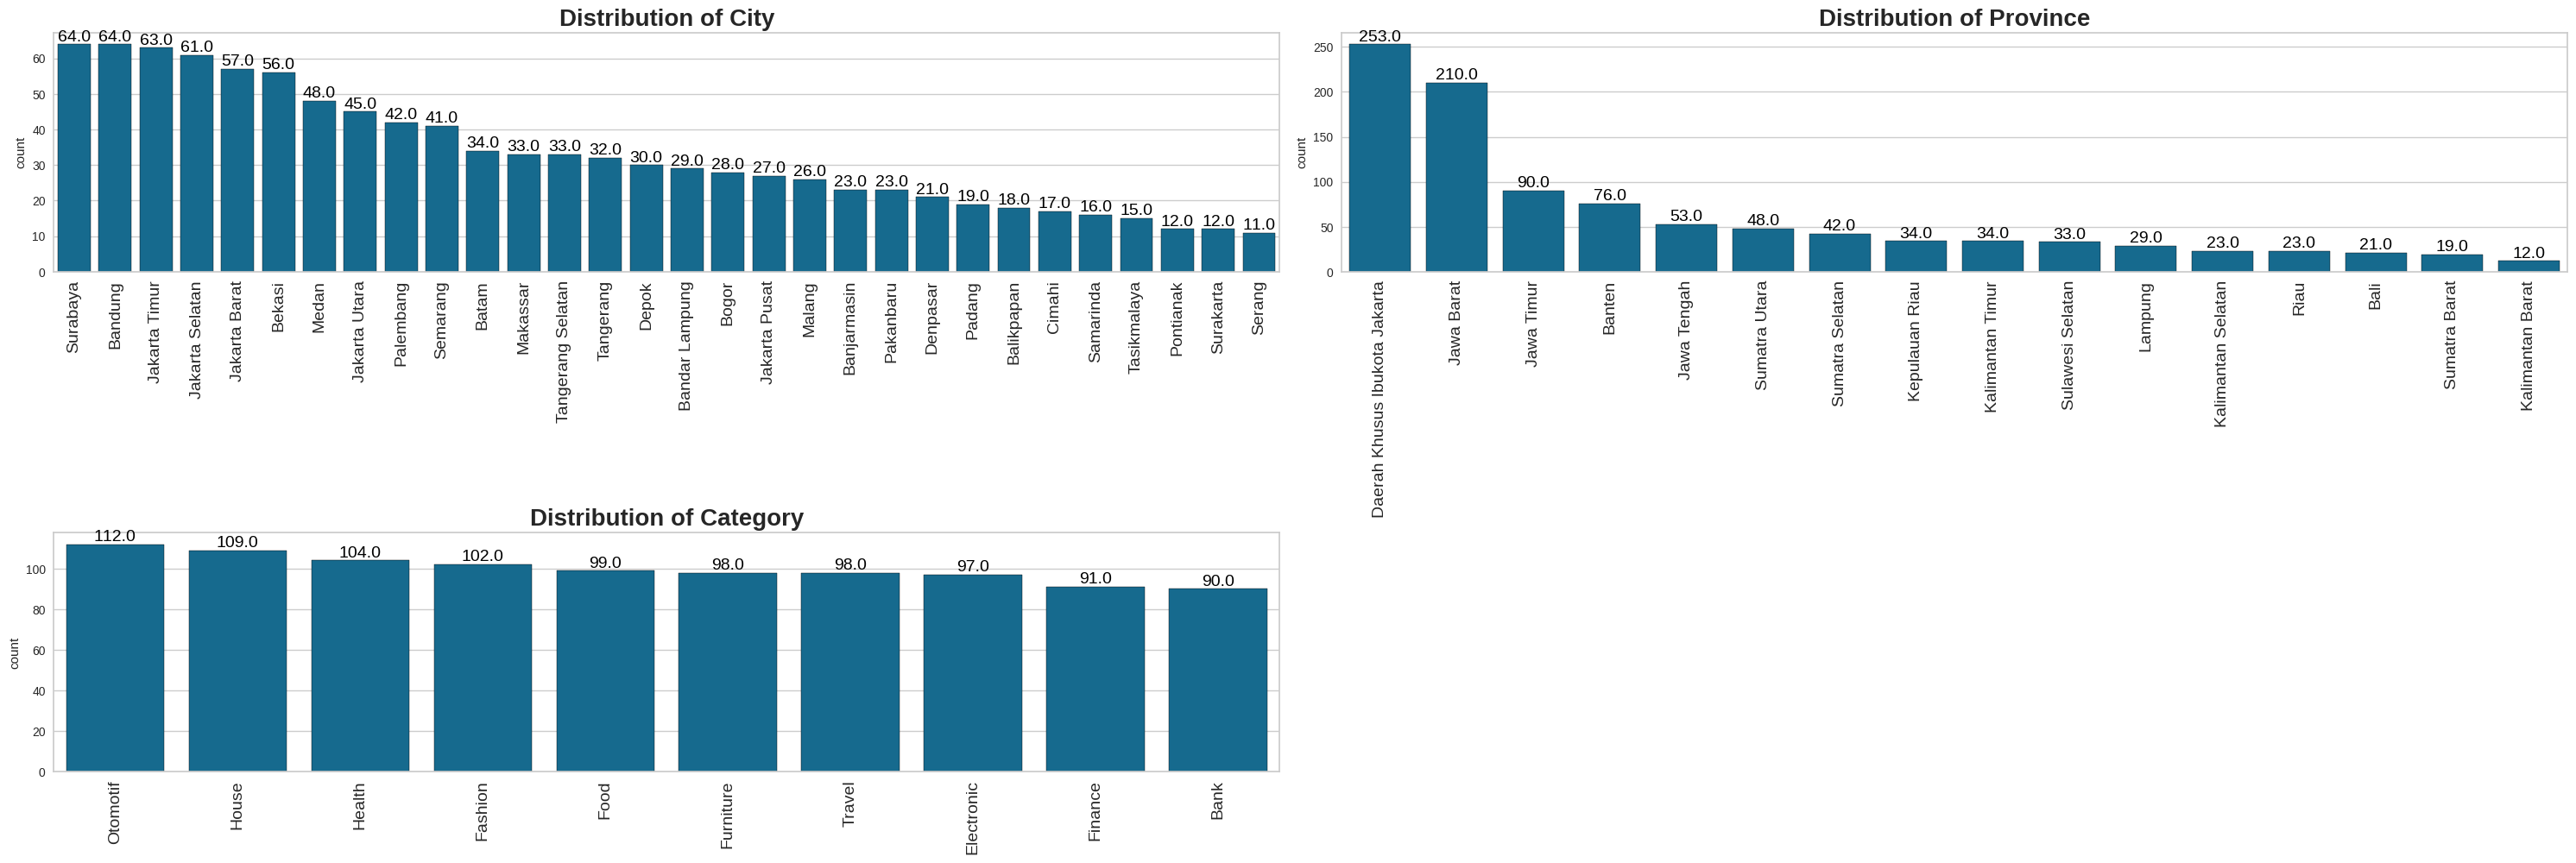

In [ ]:
# Define the columns to plot
dist_cat_lowvar = dfg[['Gender', 'Clicked on Ad']]
dist_cat_highvar = dfg[['City', 'Province', 'Category']]

# Plot low variance categories
plt.figure(figsize=(30, 15))  # Increased figure size
for i, col in enumerate(dist_cat_lowvar):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(data=dist_cat_lowvar, x=col, edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=20, fontweight='bold')  # Increased font size
    plt.xlabel('')
    plt.xticks(rotation=15, fontsize=14)  # Increased font size
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=14, color='black')  # Increased font size
plt.tight_layout()

# Plot high variance categories
plt.figure(figsize=(30, 15))  # Increased figure size
for i, col in enumerate(dist_cat_highvar):
    plt.subplot(3, 2, i+1)
    ax = sns.countplot(data=dist_cat_highvar, x=col, edgecolor='black', order=dfg[col].value_counts().index)
    plt.title(f'Distribution of {col}', fontsize=20, fontweight='bold')  # Increased font size
    plt.xlabel('')
    plt.xticks(rotation=90, fontsize=14)  # Increased font size
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=14, color='black')  # Increased font size
plt.tight_layout()

plt.show()

This plot shows the distribution of numerical and categorical features:
Categorical Features:

1. `City`: The most common city is Surabaya, with 64 occurrences.
Province: The most common province is Daerah Khusus Ibukota Jakarta, with 253 occurrences.
2. `Category`: The most common category is Otomotif, with 112 occurrences.
3. `Gender`: There are two categories: Perempuan (female) and Laki-Laki (male). The dataset seems to be fairly balanced, with 518 females and 479 males.
4. `Clicked on Ad`: There are two categories: No and Yes. The dataset is balanced with 500 individuals not clicking on the ad, and 500 clicking on the ad.
5. The city and category distributions seem to be skewed, with a few dominant categories (Surabaya and Otomotif, respectively) and a long tail of less frequent categories.
6. The province distribution is also skewed, with Daerah Khusus Ibukota Jakarta being the dominant category.
7. The gender and clicked on ad distributions are balanced, with no category dominating the others.

#### Nums Column

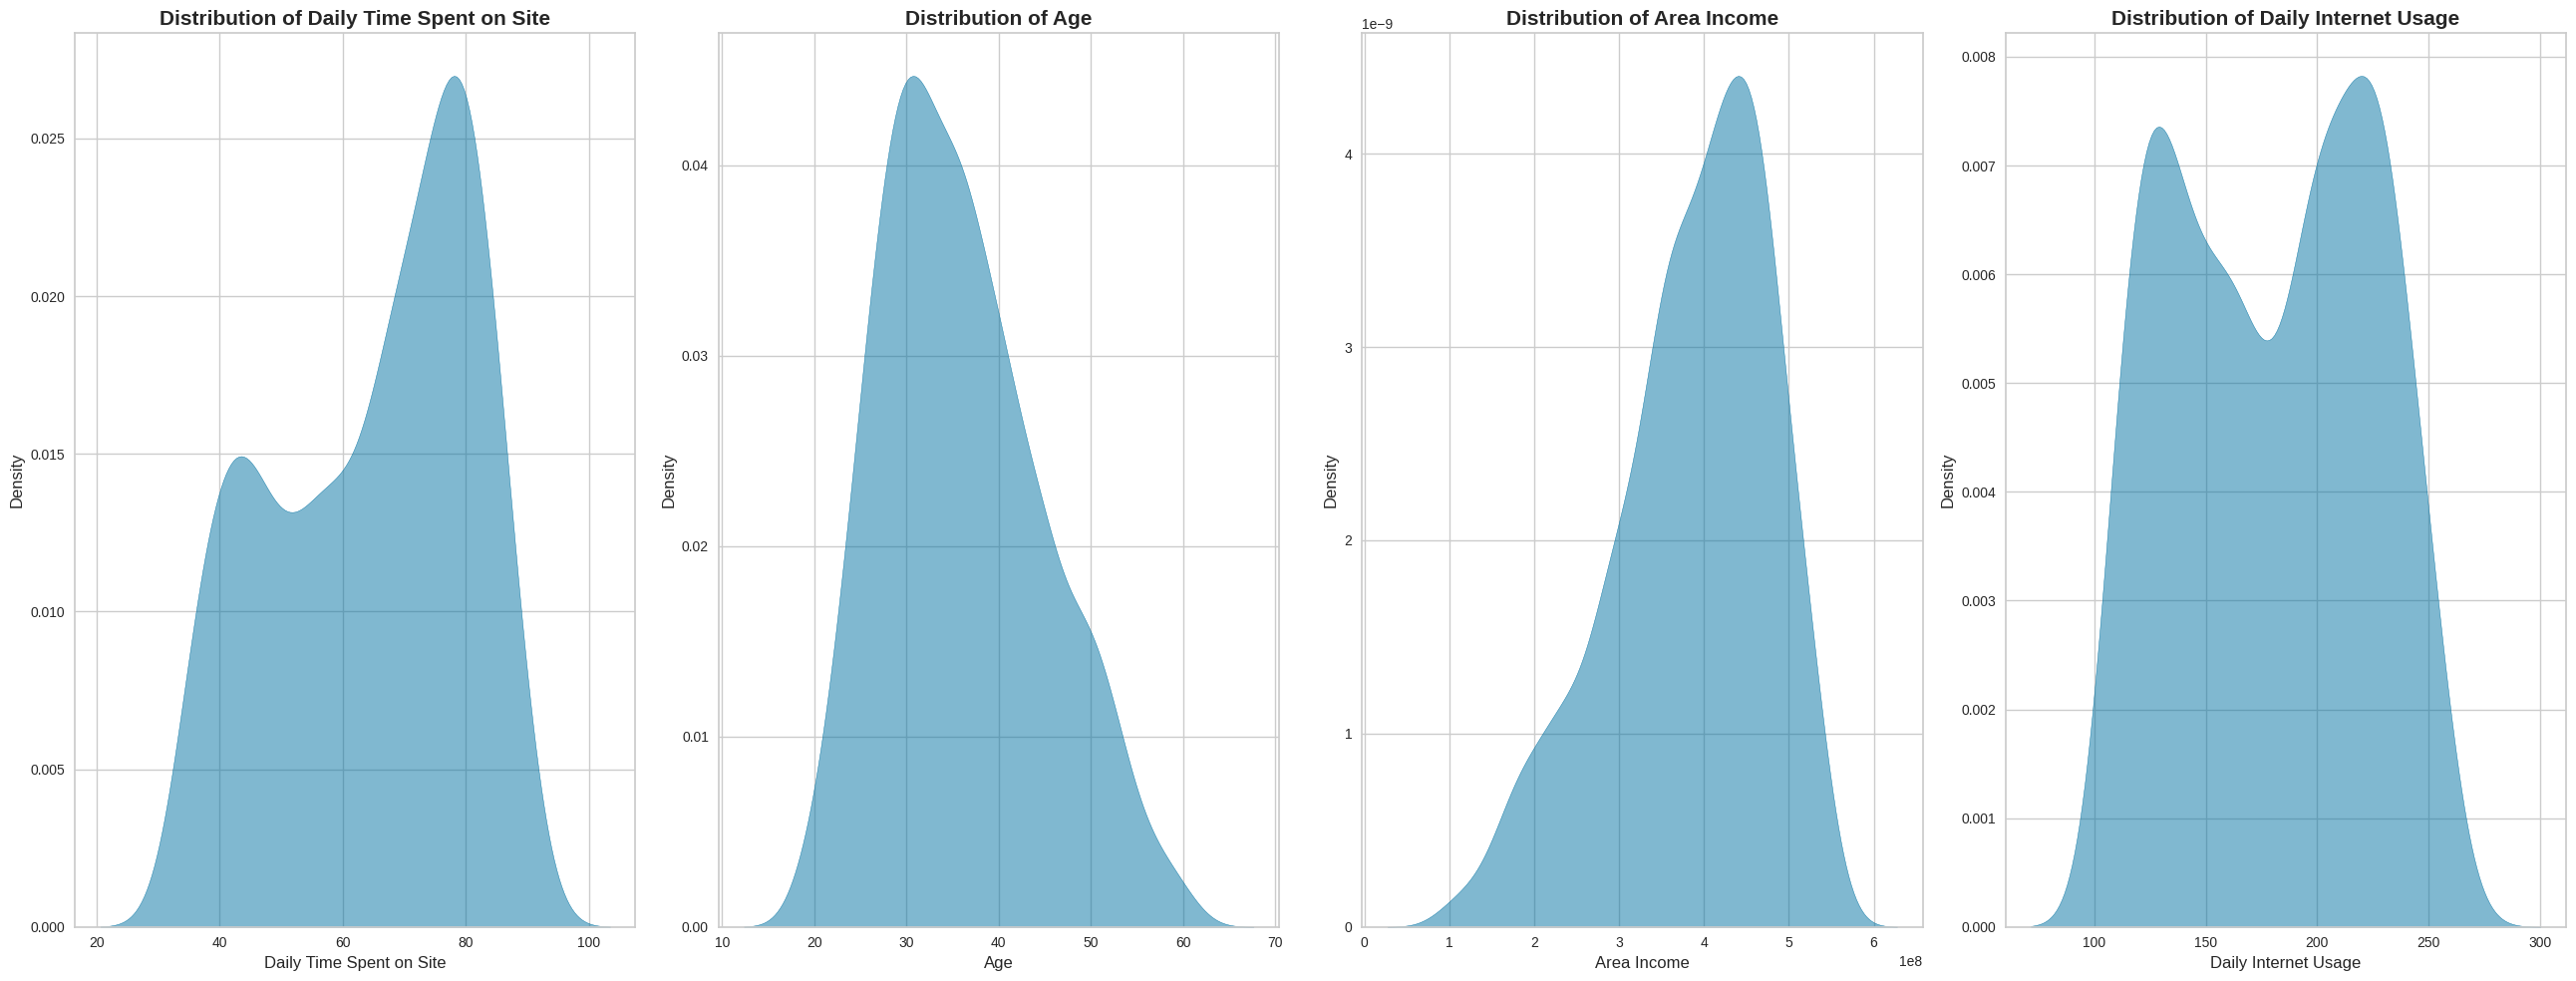

In [ ]:
# Plot low variance numerical
dist_num = dfg[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
fig, ax = plt.subplots(1, 4, figsize=(26, 10))

for i, subplot in zip(dist_num, ax.flatten()):
    sns.kdeplot(x=i, data=dist_num, ax=subplot, fill=True, alpha=0.5)
    subplot.set_title(f'Distribution of {i}', fontsize=15, fontweight='bold')
    subplot.set_xlabel(i, fontsize=12)  # Adding x-axis label
    subplot.set_ylabel('Density', fontsize=12)  # Adding y-axis label

plt.tight_layout()
plt.show()

The summary of the univariate analysis of the numerical data:

The numerical data exhibits skewed distributions, indicating a concentration of users in the lower range of the variables, with the exception of `Daily Internet Usage`, which shows a bi-modal distribution.

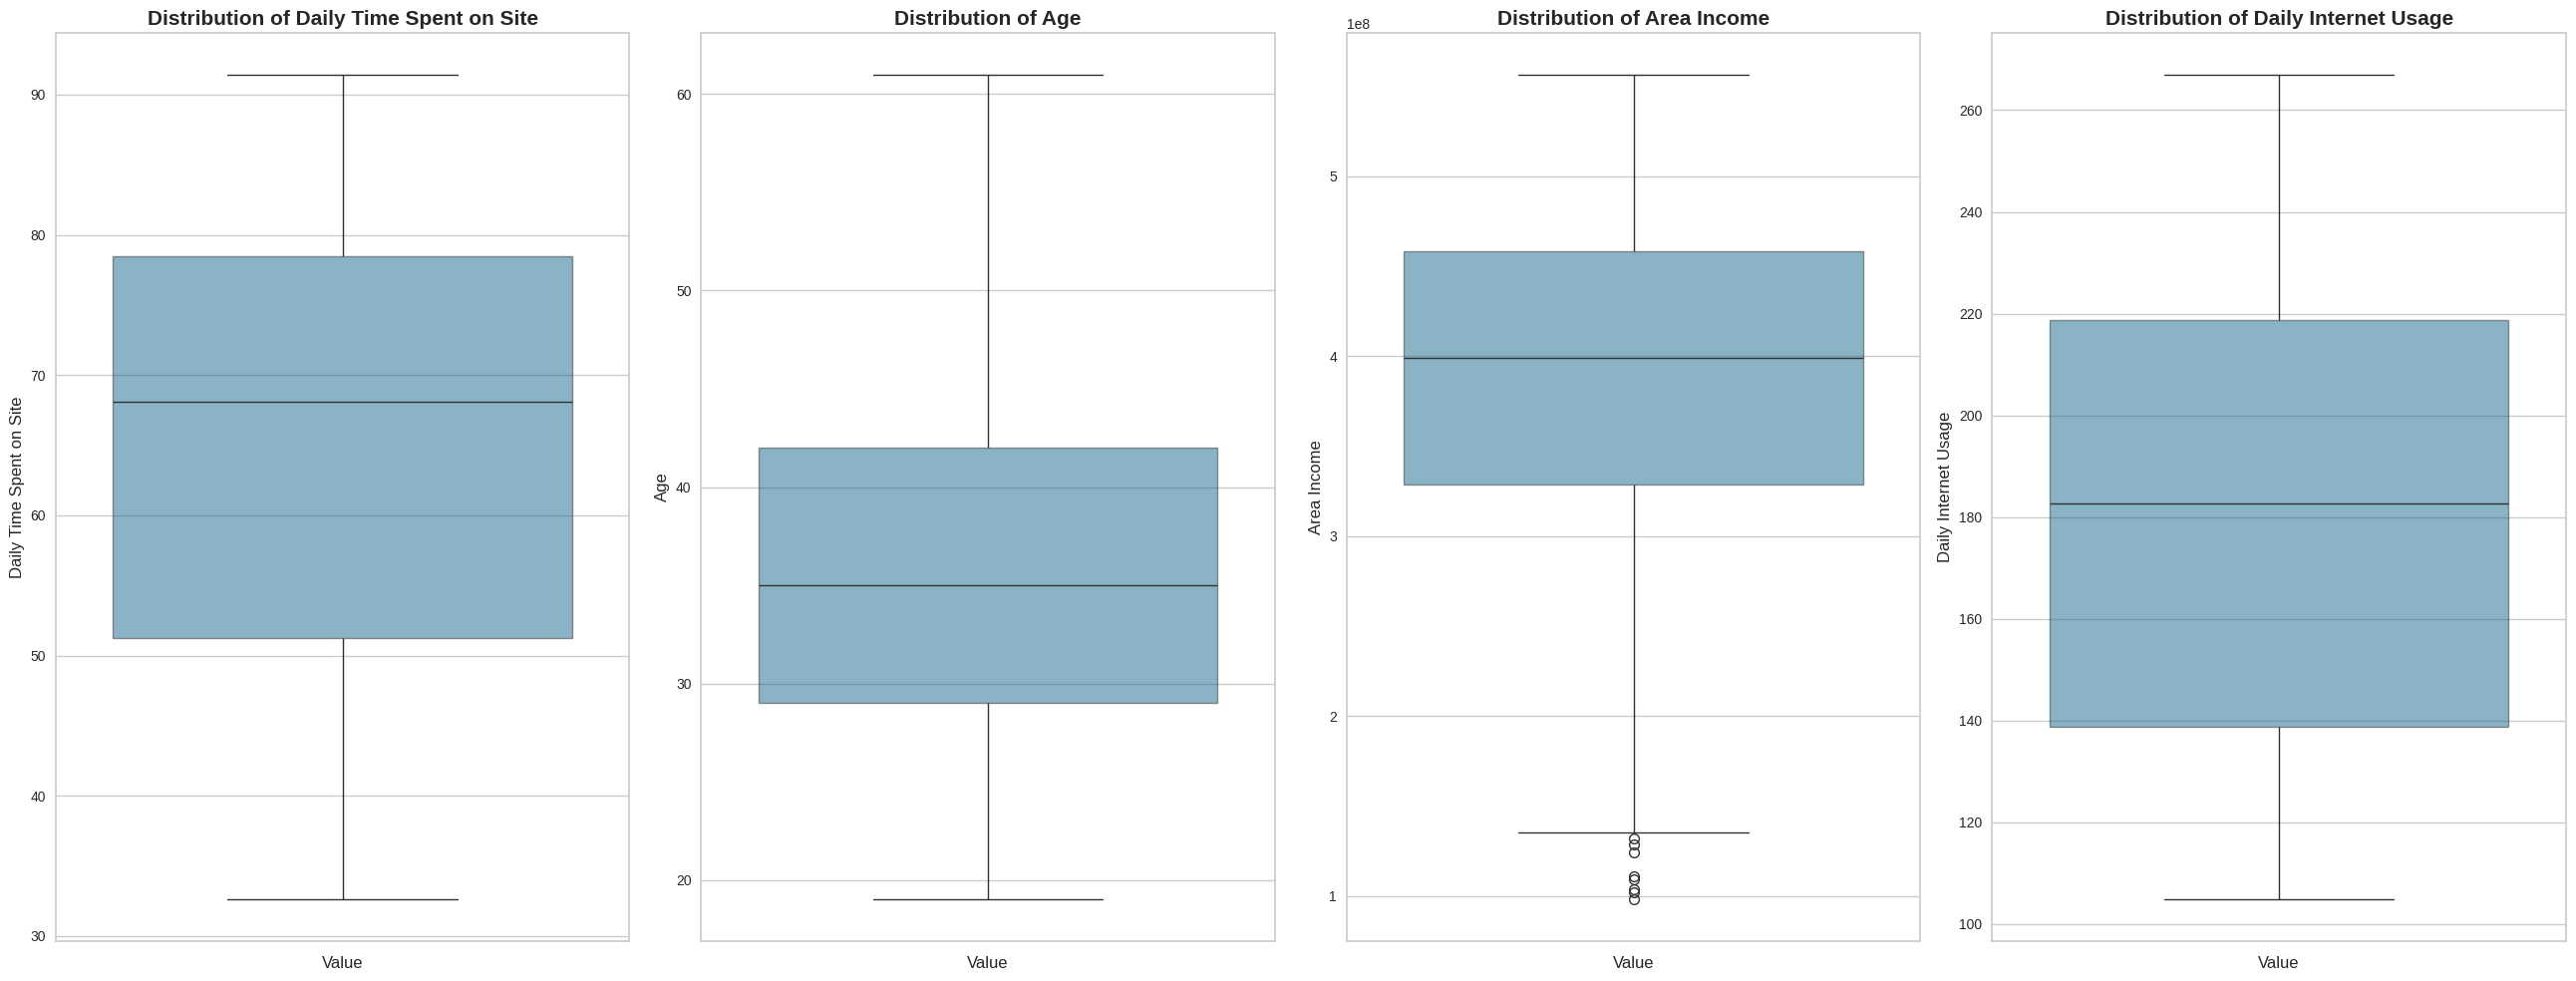

In [ ]:
# Plot low variance numerical
dist_num = dfg[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
fig, ax = plt.subplots(1, 4, figsize=(26, 10))

for i, subplot in zip(dist_num, ax.flatten()):
    sns.boxplot(y=i, data=dist_num, ax=subplot, boxprops=dict(alpha=0.5))
    subplot.set_title(f'Distribution of {i}', fontsize=15, fontweight='bold')
    subplot.set_xlabel('Value', fontsize=12)  # Adding x-axis label for horizontal plot
    subplot.set_ylabel(i, fontsize=12)  # Adding y-axis label for horizontal plot

plt.tight_layout()
plt.show()

Based this boxplot there are no outliers in the data


### Bivariate Analysis

#### Cats Column

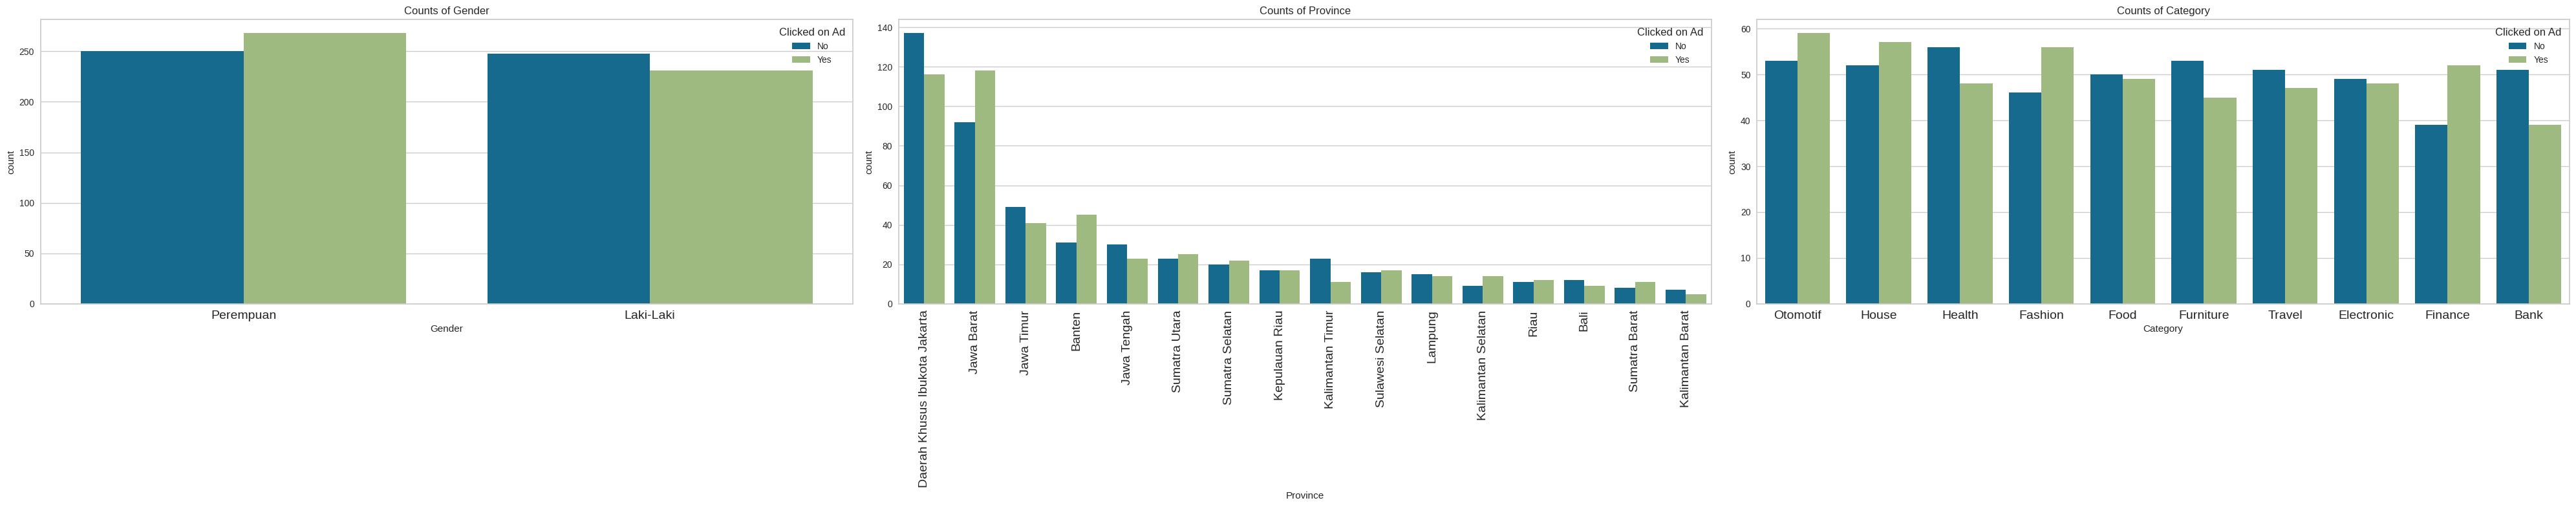

In [ ]:
# Bivariate categorical columns
bivariate_cats = dfg[['Gender', 'Province', 'Category']]

# Define orders for categorical variables if needed
gen_order = dfg['Gender'].value_counts().index
prov_order = dfg['Province'].value_counts().index
cat_order = dfg['Category'].value_counts().index

# Plot bivariate categorical columns
fig, ax = plt.subplots(1, 3, figsize=(40, 8))

for i, subplot in zip(bivariate_cats, ax.flatten()):
    sns.countplot(
        x=i,
        data=bivariate_cats,
        ax=subplot,
        hue=dfg['Clicked on Ad'],
        order=gen_order if i == 'Gender' else prov_order if i == 'Province' else cat_order)
    subplot.set_title(f'Counts of {i}')
    subplot.tick_params(axis='x', labelsize=14)
    if i not in ['Gender', 'Category']:
        for label in subplot.get_xticklabels():
            label.set_rotation(90)

plt.tight_layout()
plt.show()

Key Takeaways

Our analysis reveals the following insights:

1. `Gender` : Females are more likely to click on ads compared to males, indicating a higher engagement with advertisements among women.

2. `Province` :
    *   Jawa Barat takes the lead, with residents more likely to click on ads than those in other provinces.
    *   Bandung stands out as a city with a higher ad click-through rate compared to other cities.
    *   Daerah Khusus Ibukota Jakarta he click-through rate for ads in Jakarta is comparable to other provinces, indicating average performance in ad engagement.




#### Nums Column

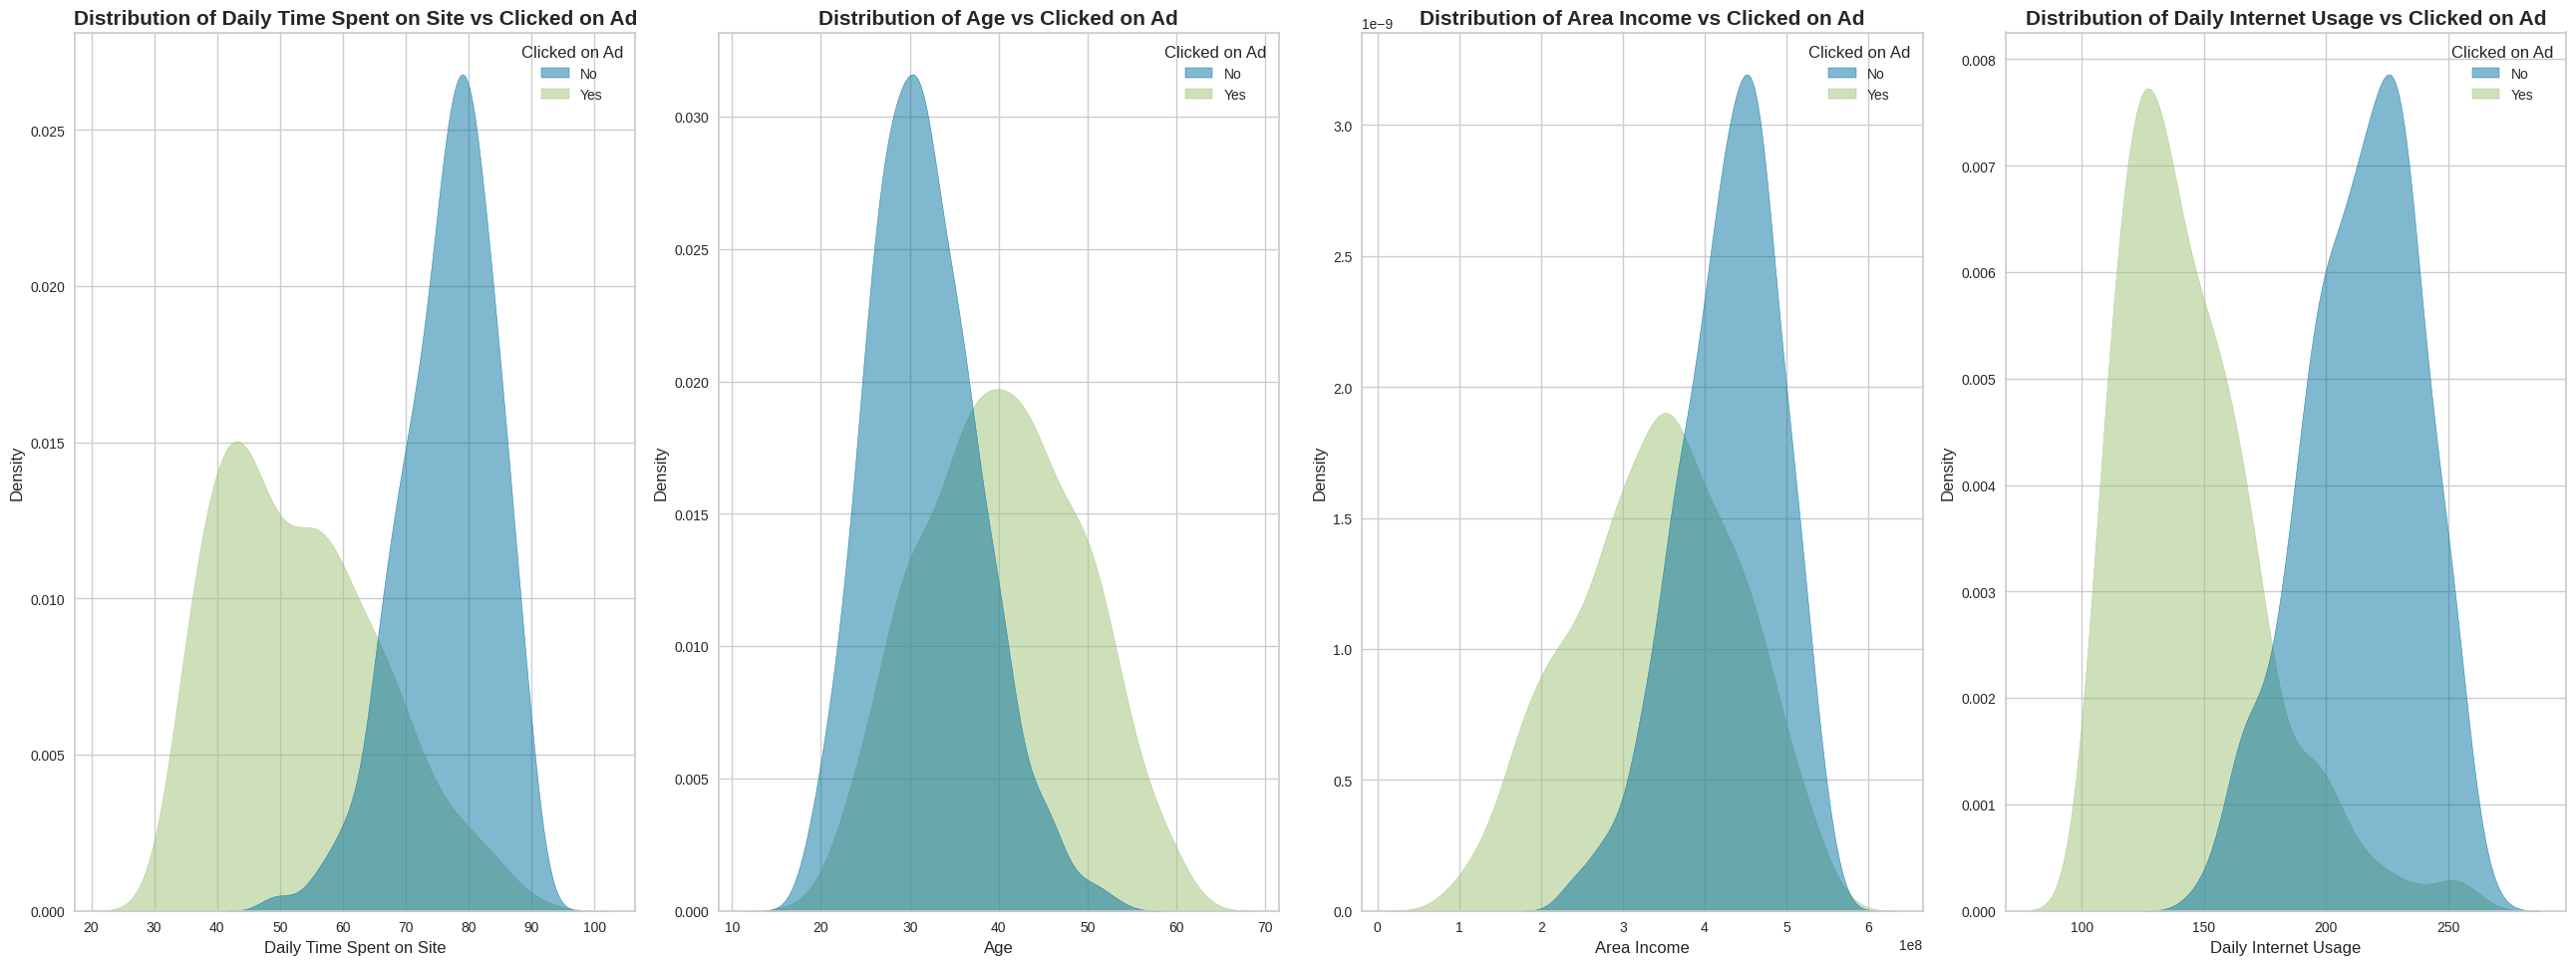

In [ ]:
# Bivariate numerical columns
bivariate_nums = dfg[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']]

# Create subplots
fig, ax = plt.subplots(1, 4, figsize=(26, 10))

# Plotting the distribution of numerical columns with respect to 'Clicked on Ad'
for i, subplot in zip(bivariate_nums, ax.flatten()):
    sns.kdeplot(x=i, data=bivariate_nums, hue='Clicked on Ad', ax=subplot, fill=True, alpha=0.5)
    subplot.set_title(f'Distribution of {i} vs Clicked on Ad', fontsize=15, fontweight='bold')
    subplot.set_xlabel(i, fontsize=12)  # Adding x-axis label
    subplot.set_ylabel('Density', fontsize=12)  # Adding y-axis label

plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

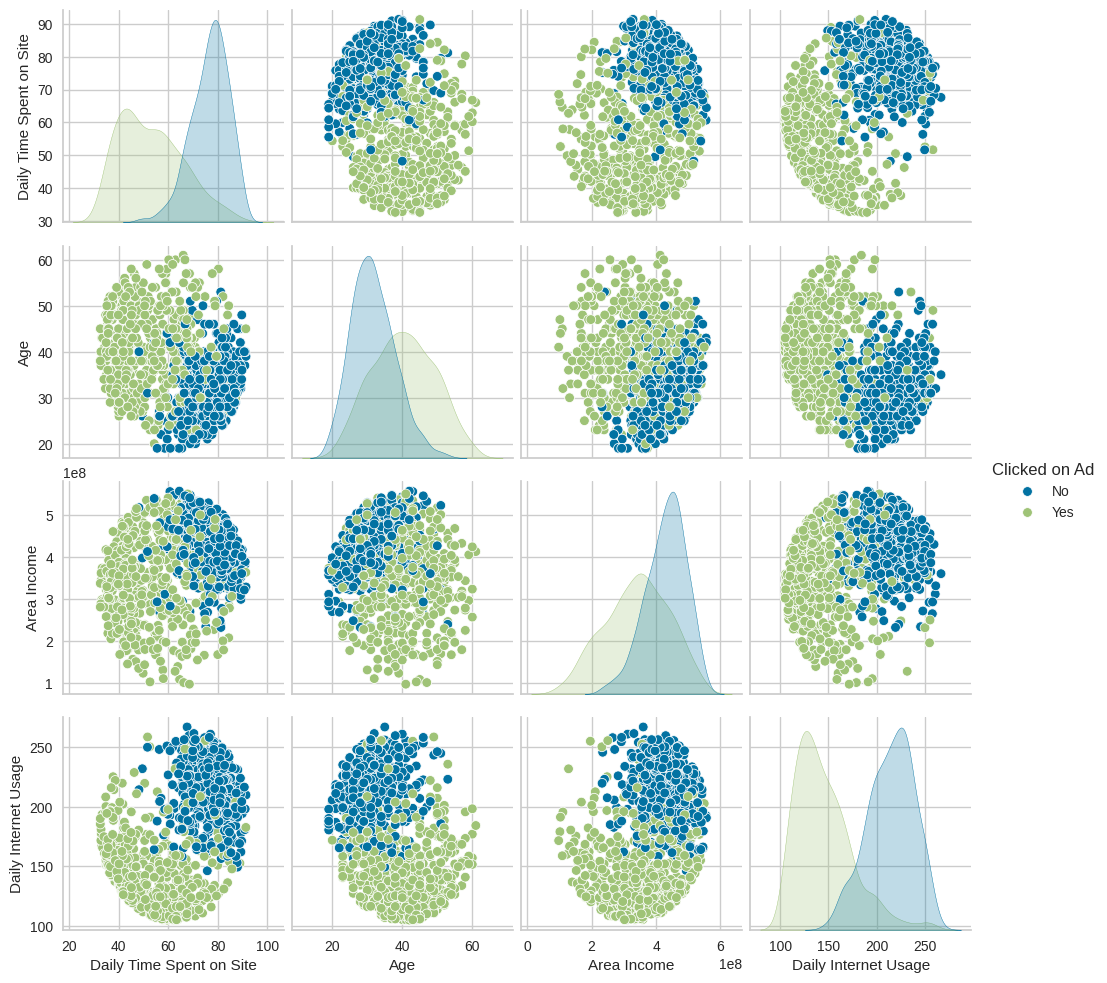

In [ ]:
# Plotting the distribution of numerical columns with respect to 'Clicked on Ad'
if 'Clicked on Ad' in dfg.columns:
    plt.figure(figsize=(8, 8))
    sns.pairplot(dfg[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']], diag_kind='kde', hue='Clicked on Ad')
    plt.show()
else:
    print("'Clicked on Ad' column is not present in the DataFrame.")

Key Inferences from Bivariate Analysis
1. `Area Income`:
    *   The highest density of customers who clicked on ads is at an area income of around le8.
    *   The highest density of customers who did not click on ads is at an area income of around le9
    *   This suggests that customers who click on ads are more likely to have a lower area income, while those who do not click on ads are more likely to have a higher area income.

2. `Daily Time Spent on Site`:

    *   The highest density of customers who clicked on ads is at a daily time spent on site of around 40 minutes.
    *   he highest density of customers who did not click on ads is at a daily time spent on site of around 80 minutes.
    *   This suggests that customers who click on ads are more likely to spend around 40 minutes on the site, while those who do not click on ads are more likely to spend around 80 minutes on the site.

3. `Daily Internet Usage`:

    *   The highest density of customers who clicked on ads is at a daily internet usage of around 115 minutes.
    *  The highest density of customers who did not click on ads is at a daily internet usage of around 210 minutes.
    *   This suggests that customers who click on ads are more likely to spend around 115 minutes or less on the internet daily, while those who do not click on ads are more likely to spend around 210 minutes or more.

4. `Age`:
    *  Younger customers tend to click on ads less frequently than older customers.
    *  This indicates that older customers are more likely to engage with ads compared to younger customers.

5. `Income`:

    *  Customers with higher incomes tend to click on ads less frequently than customers with lower incomes.
    *  This suggests that lower-income customers are more likely to engage with ads compared to higher-income customers.




### Multivariate Analysis

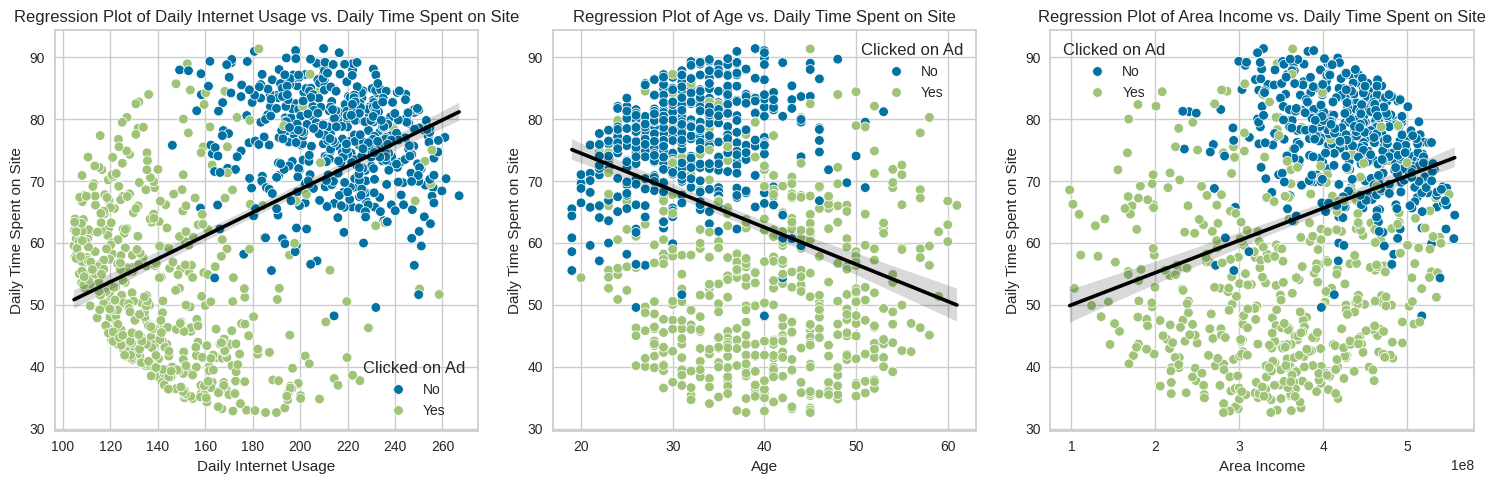

In [ ]:
# Ensure the necessary columns are included in the DataFrame
required_columns = ['Daily Internet Usage', 'Age', 'Area Income']

# Create a subplot with 1 row and as many columns as there are features
fig, axs = plt.subplots(1, len(required_columns), figsize=(15, 5))


# Loop over each feature
for i, feature in enumerate(required_columns):
    sns.scatterplot(x=feature, y='Daily Time Spent on Site', hue='Clicked on Ad', data=dfg, ax=axs[i])
    sns.regplot(x=feature, y='Daily Time Spent on Site', data=dfg, scatter=False, color='black', ax=axs[i])
    axs[i].set_title(f'Regression Plot of {feature} vs. Daily Time Spent on Site')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Daily Time Spent on Site')


plt.tight_layout()
plt.show()

Based on the three regression plots, the key takeaway is that :
1. `Daily internet usage` is a strong predictor of `daily time spent` on a site, especially for individuals who clicked on an ad. especially for individuals who clicked on an ad. This suggests that targeting users with high daily internet usage may lead to increased engagement on the site. The plots show a positive correlation between daily internet usage and daily time spent on site, meaning that as daily internet usage increases, so does daily time spent on site.

2. On the other hand, `age` and `area income` do not appear to be significant factors in determining ad engagement or daily time spent on the site. There is a negative correlation between age and daily time spent on site, indicating that as age increases, daily time spent on site decreases. The regression plot between area income and daily time spent on site shows a weak correlation, implying that area income has little impact on daily time spent on site.

Overall, the plots suggest that marketers and advertisers may want to focus on targeting users based on their online behavior, rather than demographic characteristics, to increase engagement and conversion rates. By prioritizing behavioral factors like daily internet usage, they can more effectively reach and engage with their target audience.

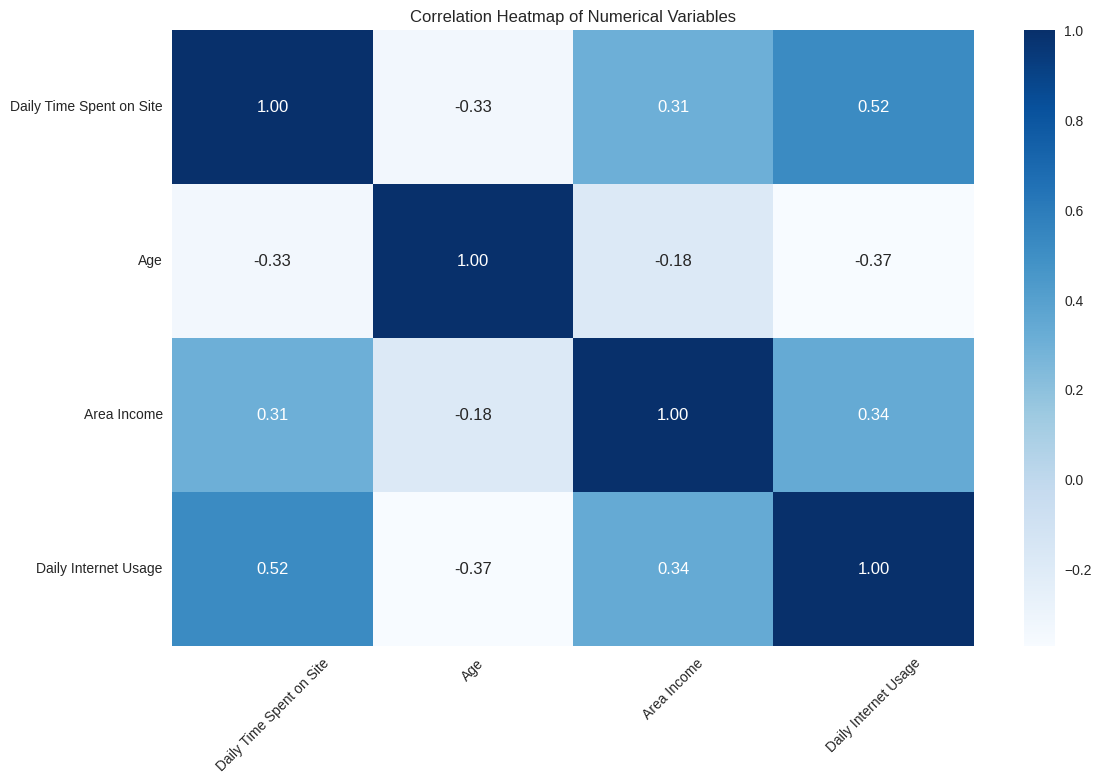

In [ ]:
# Calculate correlation matrix
corr_matrix_nums = bivariate_nums.drop('Clicked on Ad', axis=1)
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_nums.corr(), annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap of Numerical Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insights:

1. `Daily Time Spent on Site` and `Daily Internet Usage` have a moderate positive correlation (0.52), indicating that people who spend more time on the site tend to use the internet more often.
2. `Daily Time Spent on Site` and `Age` have a moderate negative correlation (-0.33), suggesting that older people tend to spend less time on the site.
4. `Daily Time Spent on Site` and `Area Income` have a strong negative correlation (-0.8), indicating that people from areas with higher income tend to spend less time on the site.
5. `Age` and `Area Income` have a moderate negative correlation (-0.4), suggesting that older people tend to come from areas with lower income.
6. `Area Income` and `Daily Internet Usage` have a moderate positive correlation (0.34), indicating that people from areas with higher income tend to use the internet more often.
6. `Age` and `Daily Internet Usage` have a moderate negative correlation (-0.37), suggesting that older people tend to use the internet less often.

## Task 2 : Data Cleaning & Preprocessing


1. Handle Missing Values
2. Handle Duplicated Values
3. Feature Engineering
4. Feature Selection/Extration
5. VFeature Encoding
6. Split Data

### Handle Missing Values

Number of missing values per column:
Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
City                         0
Province                     0
Category                     0
dtype: int64

Percentage of missing values per column:
Unnamed: 0                  0.0
Daily Time Spent on Site    1.3
Age                         0.0
Area Income                 1.3
Daily Internet Usage        1.1
Gender                      0.3
Timestamp                   0.0
Clicked on Ad               0.0
City                        0.0
Province                    0.0
Category                    0.0
dtype: float64

Variables with missing rates > 10%:
Index([], dtype='object')


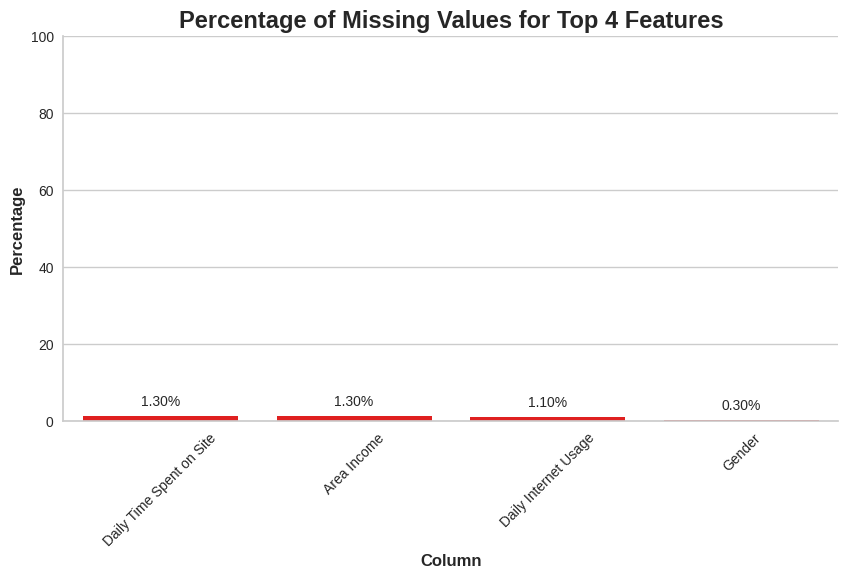

In [ ]:
# Copy dataframe
dfg2  = dfg.copy()

# Check for missing values in each column
print("Number of missing values per column:")
print(dfg2.isna().sum())

# Check the percentage of missing values
missing_percentages = (dfg2.isna().sum() / len(dfg2)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentages)

# Identify variables with high missing rates (> 10%)
high_missing_vars = missing_percentages[missing_percentages > 10].index
print("\nVariables with missing rates > 10%:")
print(high_missing_vars)

# Sort the missing percentages in descending order and select the top 4
top_missing = missing_percentages.sort_values(ascending=False).head(4)

# Visualize the missing data for the top 4 features
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_missing.index, y=top_missing.values, color='red')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f%%' % p.get_height(), xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10)

# Set plot title and axis labels
plt.title('Percentage of Missing Values for Top 4 Features', fontsize=17, fontweight='bold')
sns.despine()
plt.xlabel('Column', fontsize=12, fontweight='bold')
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Replace missing values in numeric columns with median
dfg_dailytime = dfg2['Daily Time Spent on Site'].median()
dfg2['Daily Time Spent on Site'].fillna(dfg_dailytime, inplace=True)

dfg_areaincome = dfg2['Area Income'].median()
dfg2['Area Income'].fillna(dfg_areaincome, inplace=True)

dfg_dailyinternetusage = dfg2['Daily Internet Usage'].median()
dfg2['Daily Internet Usage'].fillna(dfg_dailyinternetusage, inplace=True)

# Replace missing values in categorical column 'Gender' with mode
dfg_gender = dfg2['Gender'].mode()[0]  # Mode may return multiple values, so take the first one
dfg2['Gender'].fillna(dfg_gender, inplace=True)

# Verify if there are any remaining missing values
print("Number of missing values after imputation:")
print(dfg2.isna().sum())

Number of missing values after imputation:
Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
City                        0
Province                    0
Category                    0
dtype: int64


In [ ]:
# Checking for missing values in each column
print("Number of missing values per column in dfg2:")
print(dfg.isna().sum())
print()

# Checking for missing values in each column after handling
print("Number of missing values per column in dfg2 after handling:")
print(dfg2.isna().sum())

Number of missing values per column in dfg2:
Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
City                         0
Province                     0
Category                     0
dtype: int64

Number of missing values per column in dfg2 after handling:
Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Gender                      0
Timestamp                   0
Clicked on Ad               0
City                        0
Province                    0
Category                    0
dtype: int64


After handling the missing values, all columns now have 0 missing values, indicating that the dataset is complete and ready for further analysis or modeling.

### Handle Duplicated Values

In [ ]:
# Checking Duplicate Values
dfg2.duplicated().sum()

0

The dataset `dfg2` has been checked for duplicate values, and the result shows that there are no duplicate values to be handled. Indicating that all rows in the dataset are unique and there are no duplicate records.

### Feature Engineering

In [ ]:
# Define conditions and corresponding choices for 3 age groups
conditions_age = [
    (dfg2['Age'] < 36),   # Young Adults
    (dfg2['Age'] < 51),   # Middle-aged Adults
    (dfg2['Age'] >= 51)   # Older Adults
]
age_segments = ['Young Adults', 'Middle-aged Adults', 'Older Adults']

# Use np.select to assign values based on conditions
dfg2['AgeSegment'] = np.select(conditions_age, age_segments)

# Convert 'Timestamp' to datetime format
dfg2['Timestamp'] = pd.to_datetime(dfg2['Timestamp'])

# Extract Month, week, day, hour, and minute from 'Timestamp'
dfg2['Month'] = dfg2['Timestamp'].dt.month.astype('int64')
dfg2['Week'] = dfg2['Timestamp'].dt.weekday >= 5
dfg2['Week'] = dfg2['Week'].astype('object')
dfg2['Day'] = dfg2['Timestamp'].dt.day.astype('int')
dfg2['Hour'] = dfg2['Timestamp'].dt.hour.astype('int')
dfg2['Minute'] = dfg2['Timestamp'].dt.minute.astype('int')

# Display the updated DataFrame with selected columns
dfg2[['Age', 'AgeSegment', 'Timestamp', 'Month', 'Week', 'Day', 'Hour', 'Minute']].head()

,Age,AgeSegment,Timestamp,Month,Week,Day,Hour,Minute
0,35,Young Adults,2016-03-27 00:53:00,3,True,27,0,53
1,31,Young Adults,2016-04-04 01:39:00,4,False,4,1,39
2,26,Young Adults,2016-03-13 20:35:00,3,True,13,20,35
3,29,Young Adults,2016-01-10 02:31:00,1,True,10,2,31
4,35,Young Adults,2016-06-03 03:36:00,6,False,3,3,36


In [ ]:
dfg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   City                      1000 non-null   object        
 9   Province                  1000 non-null   object        
 10  Category                  1000 non-null   object        
 11  AgeSegment                1000 non-null   object        
 12  Month                

In [ ]:
dfg2.replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

### Feature Selection

#### Chi-square Test

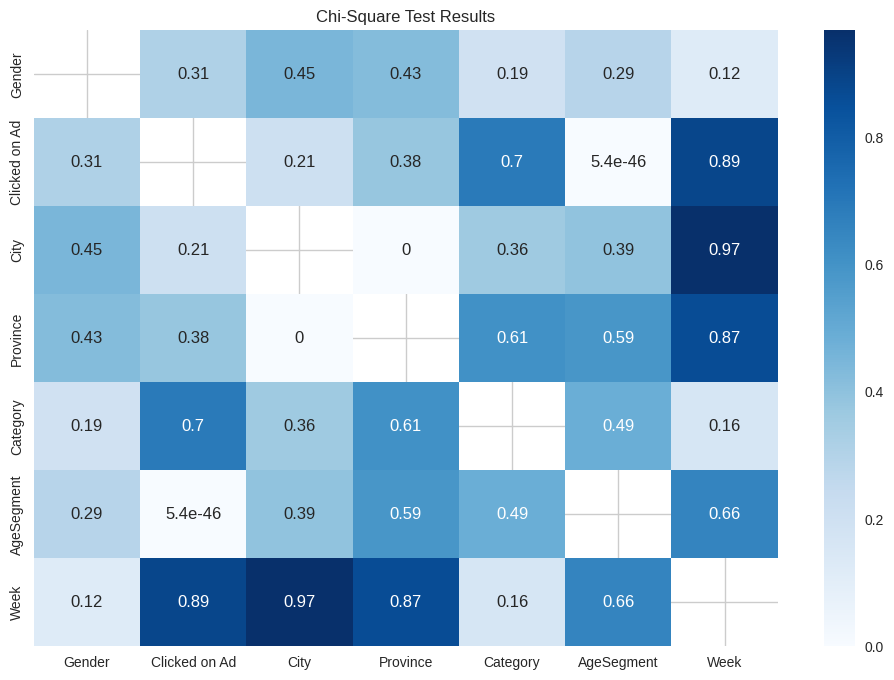

In [ ]:
# Select object-type columns from the DataFrame
object_cols = dfg2.select_dtypes(include='object')

# Create an empty DataFrame with the object columns as both the index and columns
dfg_chi2 = pd.DataFrame(index=object_cols.columns, columns=object_cols.columns)

# Loop over each pair of columns in the DataFrame
for i in object_cols.columns:
    for j in object_cols.columns:
        if i != j:
            cont_table = pd.crosstab(object_cols[i], object_cols[j])
            chi2_val, p_val, _, _ = chi2_contingency(cont_table)
            dfg_chi2.loc[i, j] = p_val

# Convert the DataFrame to numeric
dfg_chi2 = dfg_chi2.apply(pd.to_numeric)

# Create a heatmap of the p-values
plt.figure(figsize=(12,8))
sns.heatmap(dfg_chi2, annot=True, cmap='Blues')

# Display the plot
plt.title('Chi-Square Test Results')
plt.show()

The p-values in the table are actually very small (e.g., 5.4e-46), which indicates that the null hypothesis of independence can be rejected for most of the variable pairs. This suggests that the variables are statistically dependent.

In particular, the p-values suggest that:
  *   `Week` and `Clicked on Ad` are highly dependent
  *   `Gender` and `Age Segment` are highly dependent
  *   `Province` and `Category` are highly dependent
  *   `City` and `Age Segment` are highly dependent

And the small p-values indicate that the variables are not independent, and there is a significant association between them.

#### Anova Test

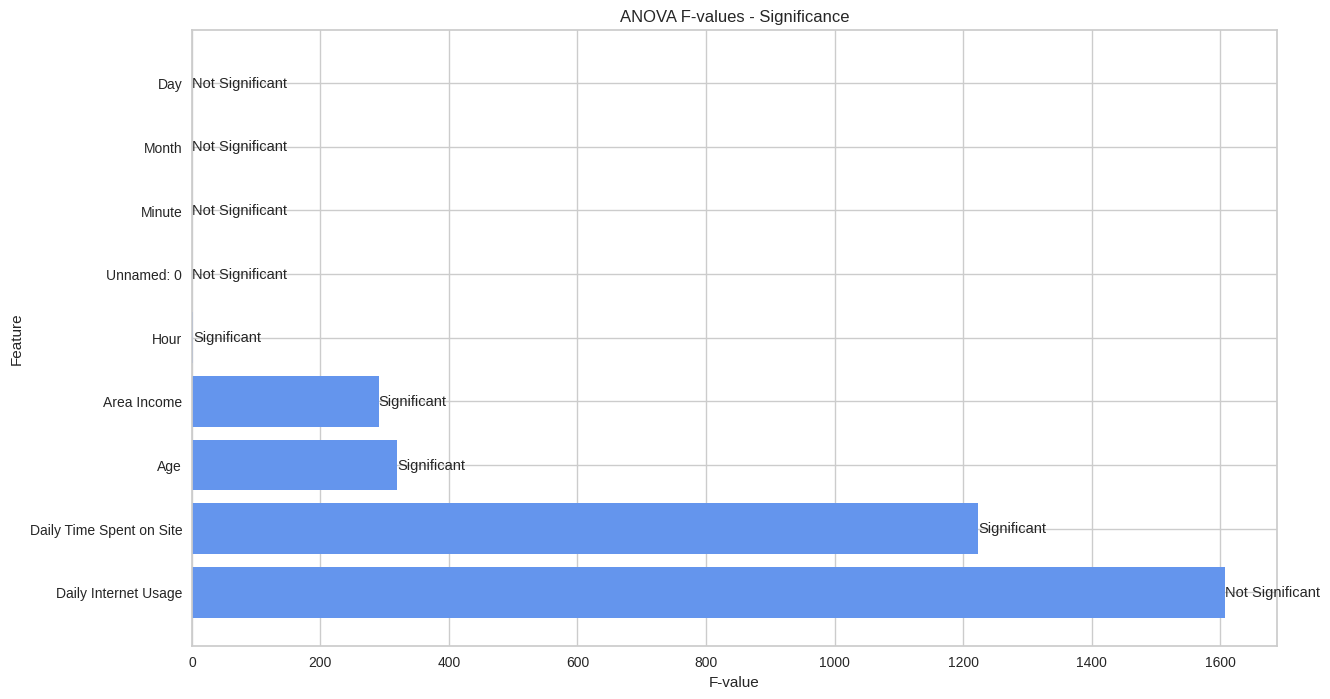

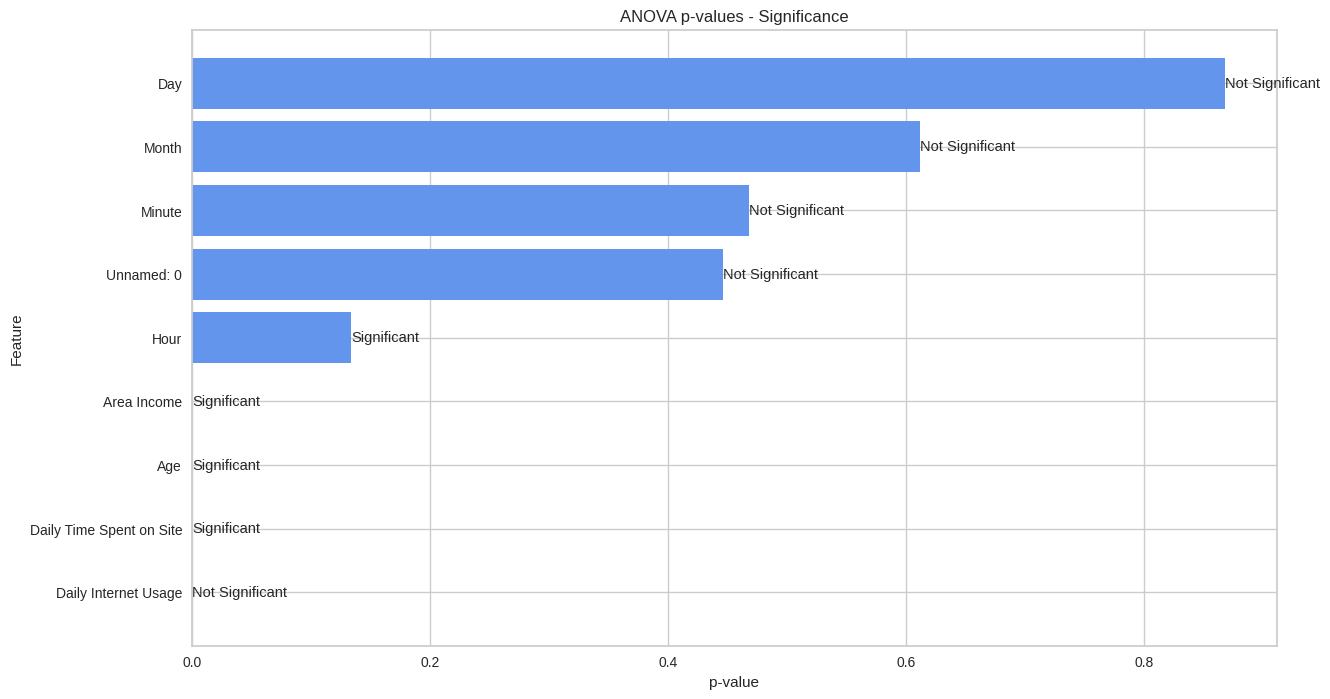

In [ ]:
# Select numerical columns from the dataframe
nums_columns = dfg2.select_dtypes('number').columns

# Initialize an empty list to store ANOVA results
target = 'Clicked on Ad'
anova_results = []

# Perform ANOVA for each numerical feature
for col in nums_columns:
    groups = dfg2.groupby(target)[col].apply(list)
    f_val, p_val = f_oneway(*groups)
    if p_val < 0.05:
        significance = 'Significant'
    else:
        significance = 'Not Significant'
    anova_results.append({'Feature': col, 'F-value': f_val, 'p-value': p_val, 'Significance': significance})

# Create a DataFrame from the list of results
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values(['F-value', 'p-value'], ascending=False)

# Plot the F-values
plt.figure(figsize=(14, 8))
bars = plt.barh(anova_df['Feature'], anova_df['F-value'], color='cornflowerblue')
plt.xlabel('F-value')
plt.ylabel('Feature')
plt.title('ANOVA F-values - Significance')

# Add text to the bars indicating the significance
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             anova_df.loc[i, 'Significance'],
             ha='left', va='center', fontsize=10.5)

# Plot the p-values
plt.figure(figsize=(14, 8))
bars = plt.barh(anova_df['Feature'], anova_df['p-value'], color='cornflowerblue')
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('ANOVA p-values - Significance')

# Add text to the bars indicating the significance
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             anova_df.loc[i, 'Significance'],
             ha='left', va='center', fontsize=10.5)

# Display the plots
plt.show()

Based on the ANOVA test results, we can infer the following:
1. `Area Income` is a significant feature: This means that the income of the area where the individual lives has a significant effect on the outcome variable. In other words, the income of the area is likely to influence the outcome, and this relationship is not due to chance (p-value < 0.05).

2. `Age` is a significant feature: This means that the age of the individual has a significant effect on the outcome variable. In other words, the age of the individual is likely to influence the outcome, and this relationship is not due to chance (p-value < 0.05).

3. `Hour` is a significant feature: This means that the hour of the day when the individual uses the site has a significant effect on the outcome variable. In other words, the hour of the day is likely to influence the outcome, and this relationship is not due to chance (p-value < 0.05).

4. `Daily Time Spent on` Site is a significant feature: This means that the amount of time the individual spends on the site daily has a significant effect on the outcome variable. In other words, the daily time spent on the site is likely to influence the outcome, and this relationship is not due to chance (p-value < 0.05).

5. `Day`, `Month`, `Minute`, ` Unnamed: 0`, and `Daily Internet Usage` are not significant features: This means that these features do not have a significant effect on the outcome variable. In other words, these features are not likely to influence the outcome, and any observed relationships are likely due to chance (p-value ≥ 0.05).

In [ ]:
dfg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Gender                    1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   City                      1000 non-null   object        
 9   Province                  1000 non-null   object        
 10  Category                  1000 non-null   object        
 11  AgeSegment                1000 non-null   object        
 12  Month                

In [ ]:
# Drop unnecessary data by the not significant ANOVA Test
unnecessary_columns = ['Unnamed: 0', 'Gender', 'Timestamp', 'City', 'Category', 'Month', 'Week', 'Day', 'Hour', 'Minute']

# Drop columns from DataFrame
dfg3 = dfg2.drop(unnecessary_columns, axis=1)

# Optionally, you can recheck the columns after dropping
print("Remaining columns after dropping unnecessary data:")
dfg3.head()

Remaining columns after dropping unnecessary data:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Province,AgeSegment
0,68.95,35,432837300.0,256.09,No,DKI Jakarta,Young Adults
1,80.23,31,479092950.0,193.77,No,Bali,Young Adults
2,69.47,26,418501580.0,236.50,No,Jawa Timur,Young Adults
3,74.15,29,383643260.0,245.89,No,Kepulauan Riau,Young Adults
4,68.37,35,517229930.0,225.58,No,Sumatra Utara,Young Adults


### Feature Encoding

In [ ]:
# Check unique values in 'Clicked on Ad' column
dfg3['Clicked on Ad'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Check unique values in 'AgeSegment' column
dfg3['AgeSegment'].unique()

array(['Young Adults', 'Middle-aged Adults', 'Older Adults'], dtype=object)

In [ ]:
# Check unique values in 'Province' column
dfg3['Province'].unique()

array(['DKI Jakarta', 'Bali', 'Jawa Timur', 'Kepulauan Riau',
       'Sumatra Utara', 'Jawa Barat', 'Lampung', 'Banten',
       'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [ ]:
# Define the mappings for label encoding
clicked_on_ad_mapping = {'No': 0, 'Yes': 1}
agesegment_mapping = {'Young Adults': 0, 'Middle-aged Adults': 1, 'Older Adults': 2}

# Applying label encoding for 'Clicked on Ad' and 'AgeSegment'
dfg3['Clicked on Ad'] = dfg3['Clicked on Ad'].map(clicked_on_ad_mapping)
dfg3['AgeSegment'] = dfg3['AgeSegment'].map(agesegment_mapping)

# Apply one-hot encoding for the 'Province' column
dfg_province = pd.get_dummies(dfg3['Province'], prefix='Province').astype(int)
dfg3 = pd.concat([dfg3, dfg_province], axis=1)

# Drop the original 'Age' and 'Province' columns
dfg3.drop(['Age', 'Province'], axis=1, inplace=True)

# Verify the changes
print("DataFrame after applying mappings and one-hot encoding:")
display(dfg3.head())

DataFrame after applying mappings and one-hot encoding:


,Daily Time Spent on Site,Area Income,Daily Internet Usage,Clicked on Ad,AgeSegment,Province_Bali,Province_Banten,Province_DKI Jakarta,Province_Jawa Barat,Province_Jawa Tengah,...,Province_Kalimantan Barat,Province_Kalimantan Selatan,Province_Kalimantan Timur,Province_Kepulauan Riau,Province_Lampung,Province_Riau,Province_Sulawesi Selatan,Province_Sumatra Barat,Province_Sumatra Selatan,Province_Sumatra Utara
0,68.95,432837300.0,256.09,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,479092950.0,193.77,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,418501580.0,236.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,383643260.0,245.89,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,68.37,517229930.0,225.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfg3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Daily Time Spent on Site     1000 non-null   float64
 1   Area Income                  1000 non-null   float64
 2   Daily Internet Usage         1000 non-null   float64
 3   Clicked on Ad                1000 non-null   int64  
 4   AgeSegment                   1000 non-null   int64  
 5   Province_Bali                1000 non-null   int64  
 6   Province_Banten              1000 non-null   int64  
 7   Province_DKI Jakarta         1000 non-null   int64  
 8   Province_Jawa Barat          1000 non-null   int64  
 9   Province_Jawa Tengah         1000 non-null   int64  
 10  Province_Jawa Timur          1000 non-null   int64  
 11  Province_Kalimantan Barat    1000 non-null   int64  
 12  Province_Kalimantan Selatan  1000 non-null   int64  
 13  Province_Kalimantan

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming dfg_pt2 contains your processed DataFrame with features and target
X = dfg3.drop('Clicked on Ad', axis=1)  # Features
y = dfg3['Clicked on Ad']  # Target

# Split the data with a 70:30 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1103)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (700, 20)
X_test shape: (300, 20)
y_train shape: (700,)
y_test shape: (300,)


## Task 3 : Data Modelling


1. Modelling

In [ ]:
# Assuming dfg contains your original DataFrame
X_validation = dfg.copy().drop(columns='Clicked on Ad')
y_validation = dfg[['Clicked on Ad']]

# Fill missing values with median or mode
dfg_dailytime = X_validation['Daily Time Spent on Site'].median()
X_validation['Daily Time Spent on Site'].fillna(dfg_dailytime, inplace=True)

dfg_areaincome = X_validation['Area Income'].median()
X_validation['Area Income'].fillna(dfg_areaincome, inplace=True)

dfg_dailyinternetusage = X_validation['Daily Internet Usage'].median()
X_validation['Daily Internet Usage'].fillna(dfg_dailyinternetusage, inplace=True)

# Handle categorical variables
dfg_gender = X_validation['Gender'].mode()[0]
X_validation['Gender'].fillna(dfg_gender, inplace=True)

# Create AgeSegment based on conditions_age and age_segments
X_validation['AgeSegment'] = np.select(conditions_age, age_segments)

# Replace 'Daerah Khusus Ibukota Jakarta' with 'DKI Jakarta'
X_validation['Province'] = X_validation['Province'].replace('Daerah Khusus Ibukota Jakarta','DKI Jakarta',inplace=True)

# Drop unnecessary columns
unnecessary_columns = ['Unnamed: 0', 'Gender', 'Timestamp', 'City', 'Category']
X_validation = X_validation.drop(unnecessary_columns, axis=1)

# Map target variable 'Clicked on Ad'
y_validation['Clicked on Ad'] = y_validation['Clicked on Ad'].map(clicked_on_ad_mapping)
X_validation['AgeSegment'] = X_validation['AgeSegment'].map(agesegment_mapping)

# Convert 'Province' to dummy variables
dfg_province = pd.get_dummies(X_validation['Province'], prefix='Province').astype(int)
X_validation = pd.concat([X_validation, dfg_province], axis=1)

# Drop columns 'Province' and 'Age'
X_validation.drop(['Province', 'Age'], inplace=True, axis=1)

### Modelling Before Standardization/Scaling

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test, X_validation, threshold):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Prediciton for training data and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Predict probabilities of the positive class for the training and testing data
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC AUC, Accuracy, Recall, Precission, F1 score for the training and testing data
    train_roc_auc = roc_auc_score(y_train, y_train_prob)
    test_roc_auc = roc_auc_score(y_test, y_test_prob)
    train_accuracy = accuracy_score(y_train, y_train_prob > threshold)
    test_accuracy = accuracy_score(y_test, y_test_prob > threshold)
    train_recall = recall_score(y_train, y_train_prob > threshold)
    test_recall = recall_score(y_test, y_test_prob > threshold)
    train_precision = precision_score(y_train, y_train_prob > threshold)
    test_precision = precision_score(y_test, y_test_prob > threshold)
    train_f1 = f1_score(y_train, y_train_prob > threshold)
    test_f1 = f1_score(y_test, y_test_prob > threshold)

    # Test the cross-validation on validation data
    cross_validation_score = cross_val_score(model, X_validation, y_validation, cv=5, scoring='roc_auc').mean()

    # Return a dictionary containing the model name and its performance metrics
    return {
        'model': model.__class__.__name__,
        'train_AUC': round(train_roc_auc, 2),
        'test_AUC': round(test_roc_auc, 2),
        'cross_val_AUC': round(cross_validation_score, 2),
        'train_accuracy': round(train_accuracy, 2),
        'test_accuracy': round(test_accuracy, 2),
        'train_recall': round(train_recall, 2),
        'test_recall': round(test_recall, 2),
        'train_precision': round(train_precision, 2),
        'test_precision': round(test_precision, 2),
        'train_f1': round(train_f1, 2),
        'test_f1': round(test_f1, 2)
    }

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# Define the models
log_reg  = LogisticRegression(random_state=1103)
dec_tree  = DecisionTreeClassifier(random_state=1103)
rand_forest  = RandomForestClassifier(random_state=1103)
xgb  = XGBClassifier(random_state=1103)

# The models
the_modelling = [log_reg, dec_tree, rand_forest, xgb]
models_results = [evaluate_model(model, X_train, y_train, X_test, y_test, X_validation, threshold=0.3) for model in the_modelling]

# Create a DataFrame the models
results_df = pd.DataFrame(models_results)

# Plot the  metrics
def melt_plot(the_model_result, train_metrics, test_metrics):
    # Melt the DataFrame for plotting
    data_melt = the_model_result.melt(id_vars='model', value_vars=[train_metrics, test_metrics])

    # Make the plot
    plt.figure(figsize=(18, 8))
    sns.barplot(x='model', y='value', hue='variable', data=data_melt)
    plt.xlabel('Model Type')
    plt.ylabel('Score Value')
    plt.title(f'Training vs Testing {train_metrics} for Each Model')

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,LogisticRegression,0.77,0.77,0.77,0.5,0.51,1.0,1.00,0.5,0.51,0.66,0.68
1,DecisionTreeClassifier,1.00,0.93,0.94,1.0,0.93,1.0,0.92,1.0,0.94,1.00,0.93
2,RandomForestClassifier,1.00,0.98,0.99,1.0,0.93,1.0,0.96,1.0,0.90,1.00,0.93
3,XGBClassifier,1.00,0.98,0.99,1.0,0.93,1.0,0.93,1.0,0.93,1.00,0.93


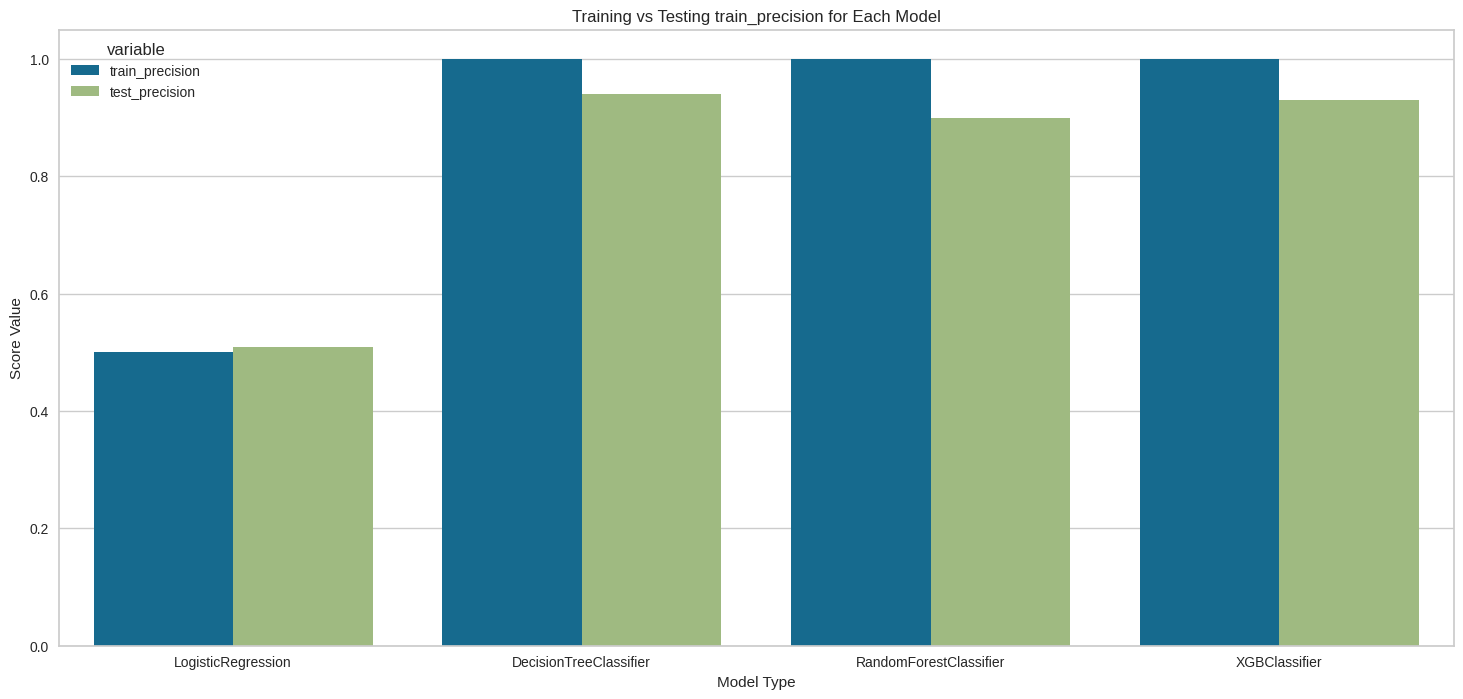

In [ ]:
# Example usage: plotting ROC AUC scores for train and test sets
display(results_df)
melt_plot(results_df, 'train_precision', 'test_precision')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model_lst, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 6))

    for model in model_lst:
        model.fit(X_train, y_train)
        y_test_probas = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_test_probas)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

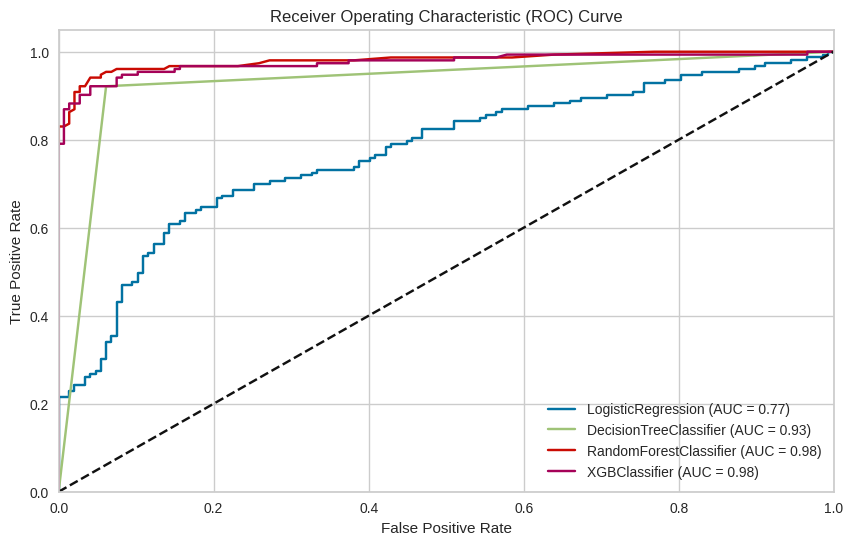

In [ ]:
# Example usage for logistic regression model
plot_roc_curve(the_modelling, X_train, y_train, X_test, y_test)

Here is a summary of the chart in point form:

1. **Logistic Regression**
    *   AUC score: 0.77
    *   Ranking: Worst performing model
    *   Performance: Fairly good, but not as good as the other models
    *   Summary: Logistic Regression has a relatively lower AUC score, indicating it may not be the best choice for this classification task.
2. **Decision Tree Classifier**
    *   AUC Score: 0.93
    *   Ranking: Third best performing model
    *   Performance: Good, able to distinguish between positive and negative classes with some accuracy
    *   Summary: Decision Tree Classifier has a good AUC score, indicating it can distinguish between classes fairly well.
3. **Random Forest Classifier**
    *   AUC Score: 0.98
    *   Ranking: Second best performing model
    *   Performance: Excellent, able to distinguish between positive and negative classes with high accuracy
    *   Summary: Random Forest Classifier has a very high AUC score, indicating it can distinguish between classes with high accuracy.
4. **XGB Classifier**
    *   AUC Score: 0.98
    *   Ranking: Best performing model
    *   Performance: Excellent, able to distinguish between positive and negative classes with high accuracy
    *   Summary: XGB Classifier has the highest AUC score, indicating it is the best performing model for this classification task.

**Overall Summary** :
All four algorithms have good performance, with AUC scores above 0.77, indicating their ability to distinguish between positive and negative classes with some accuracy. However, XGB Classifier and Random Forest Classifier stand out as the top performers.




### Scaling The Training and Testing Datasets

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Display the scaled data
print('Scaled Training Data (Features Standardized):')
display(X_train_scaled)
print('\nScaled Testing Data (Features Standardized):')
display(X_test_scaled)

Scaled Training Data (Features Standardized):


,Daily Time Spent on Site,Area Income,Daily Internet Usage,AgeSegment,Province_Bali,Province_Banten,Province_DKI Jakarta,Province_Jawa Barat,Province_Jawa Tengah,Province_Jawa Timur,Province_Kalimantan Barat,Province_Kalimantan Selatan,Province_Kalimantan Timur,Province_Kepulauan Riau,Province_Lampung,Province_Riau,Province_Sulawesi Selatan,Province_Sumatra Barat,Province_Sumatra Selatan,Province_Sumatra Utara
0,0.513839,0.700082,0.714229,-0.875418,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,5.986828,-0.184319,-0.132068,-0.204124,-0.225945
1,-1.208658,-0.345368,-1.257807,-0.875418,-0.126353,-0.283279,-0.553146,1.837117,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
2,0.338799,-0.640786,1.863120,-0.875418,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,5.307228,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
3,-0.458395,-0.523576,-1.646469,0.724562,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,5.307228,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
4,0.707271,-0.648456,1.117480,-0.875418,-0.126353,-0.283279,1.807842,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.025007,0.604075,1.213905,0.724562,-0.126353,-0.283279,-0.553146,1.837117,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
696,0.747226,0.960870,0.296844,-0.875418,-0.126353,-0.283279,-0.553146,1.837117,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
697,0.194200,-2.181549,-0.403661,0.724562,-0.126353,-0.283279,-0.553146,1.837117,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
698,1.200682,0.985327,0.338104,0.724562,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,3.358676,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945



Scaled Testing Data (Features Standardized):


,Daily Time Spent on Site,Area Income,Daily Internet Usage,AgeSegment,Province_Bali,Province_Banten,Province_DKI Jakarta,Province_Jawa Barat,Province_Jawa Tengah,Province_Jawa Timur,Province_Kalimantan Barat,Province_Kalimantan Selatan,Province_Kalimantan Timur,Province_Kepulauan Riau,Province_Lampung,Province_Riau,Province_Sulawesi Selatan,Province_Sumatra Barat,Province_Sumatra Selatan,Province_Sumatra Utara
0,0.148538,-0.338062,-1.654904,0.724562,-0.126353,3.530090,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
1,-0.599188,-1.970444,0.747510,-0.875418,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,9.300538,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
2,-1.750268,-1.888703,-0.271903,0.724562,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,4.898979,-0.225945
3,-1.622159,0.773424,-0.371747,0.724562,-0.126353,-0.283279,1.807842,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
4,1.183558,0.694869,0.927594,0.724562,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,7.000000,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.491513,0.928600,-0.478202,0.724562,-0.126353,-0.283279,1.807842,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
296,-0.208519,-1.712272,-1.483938,-0.875418,-0.126353,-0.283279,-0.553146,1.837117,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
297,0.593749,0.681811,-0.381549,-0.875418,-0.126353,-0.283279,-0.553146,-0.544331,-0.268282,-0.297736,-0.107521,7.000000,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945
298,-1.892329,-0.254007,-0.587848,0.724562,-0.126353,-0.283279,1.807842,-0.544331,-0.268282,-0.297736,-0.107521,-0.142857,-0.19245,-0.180134,-0.188422,-0.167033,-0.184319,-0.132068,-0.204124,-0.225945


In [ ]:
# Initialize the scaler
X_validation_scaler = StandardScaler()

# Use the scaler fitted on X_train to transform X_validation
X_val_scaled = pd.DataFrame(X_validation_scaler.fit_transform(X_validation), columns=X_validation.columns)

# Display the scaled data
print('Scaled Validation Data (Features Standardized):')
display(X_val_scaled)

Scaled Validation Data (Features Standardized):


,Daily Time Spent on Site,Area Income,Daily Internet Usage,AgeSegment
0,0.252844,0.511468,1.747324,-0.879016
1,0.969602,1.006536,0.318199,-0.879016
2,0.285886,0.358035,1.298085,-0.879016
3,0.583264,-0.015049,1.513417,-0.879016
4,0.215989,1.414711,1.047667,-0.879016
...,...,...,...,...
995,0.508284,1.227005,0.657823,-0.879016
996,-0.868680,0.957113,-1.042818,0.719195
997,0.199468,-0.943342,-1.365013,2.317406
998,-0.598625,-0.980423,0.184734,-0.879016


### Modelling After Standardization/Scalling

,model,train_AUC,test_AUC,cross_val_AUC,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,LogisticRegression,0.99,0.98,0.99,0.97,0.94,0.97,0.96,0.96,0.92,0.97,0.94
1,DecisionTreeClassifier,1.00,0.93,0.94,1.00,0.93,1.00,0.92,1.00,0.94,1.00,0.93
2,RandomForestClassifier,1.00,0.98,0.99,1.00,0.93,1.00,0.96,1.00,0.90,1.00,0.93
3,XGBClassifier,1.00,0.98,0.99,1.00,0.93,1.00,0.93,1.00,0.93,1.00,0.93


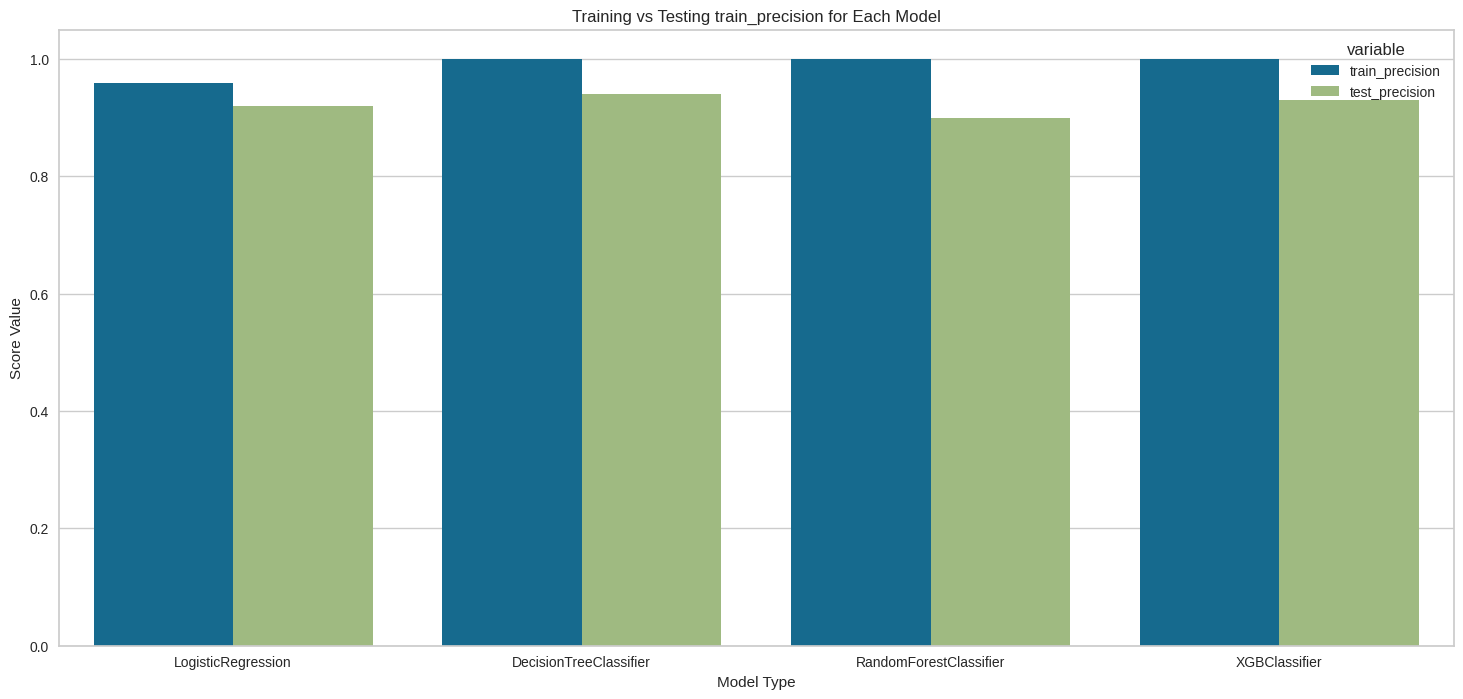

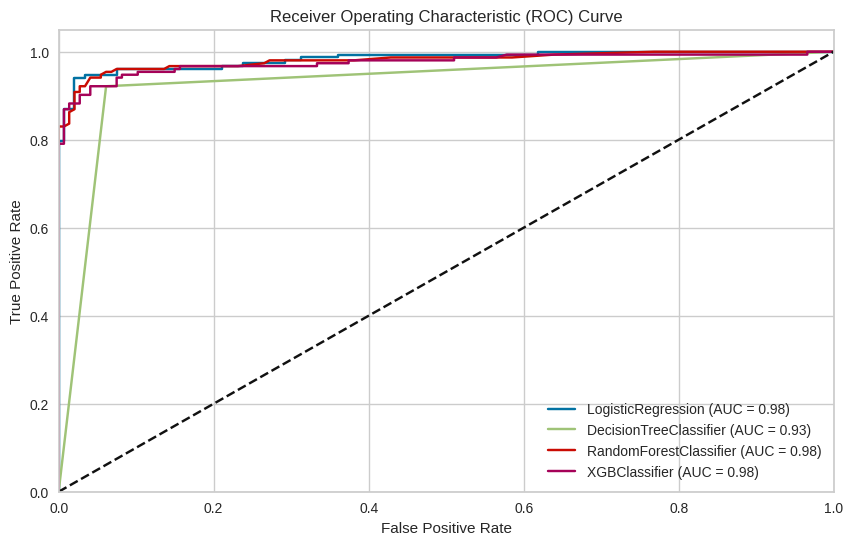

In [ ]:
# Evaluate each model
models_results2 = [evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, X_val_scaled, 0.3) for model in the_modelling]

# Create a DataFrame the models
results_df2 = pd.DataFrame(models_results2)

# Example usage: plotting ROC AUC scores for train and test sets
display(results_df2)
melt_plot(results_df2, 'train_precision', 'test_precision')

# Example usage for logistic regression model
plot_roc_curve(the_modelling, X_train_scaled, y_train, X_test_scaled, y_test)

Here is a summary of the chart in point form:

1. **Logistic Regression**
    *   AUC score: 0.98
    *   Ranking: Top performing model (tied)
    *   Performance:  Excellent, able to distinguish between positive and negative classes with high accuracy
    *   Summary: Logistic Regression has a very high AUC score, indicating it can distinguish between classes with high accuracy.
2. **Decision Tree Classifier**
    *   AUC Score: 0.93
    *   Ranking: Third best performing model
    *   Performance: Good, able to distinguish between positive and negative classes with some accuracy
    *   Summary: Decision Tree Classifier has a good AUC score, indicating it can distinguish between classes fairly well.
3. **Random Forest Classifier**
    *   AUC Score: 0.98
    *   Ranking: Top performing model (tied)
    *   Performance: Excellent, able to distinguish between positive and negative classes with high accuracy
    *   Summary: Random Forest Classifier has a very high AUC score, indicating it can distinguish between classes with high accuracy.
4. **XGB Classifier**
    *   AUC Score: 0.98
    *   Ranking: Top performing model (tied)
    *   Performance: Excellent, able to distinguish between positive and negative classes with high accuracy
    *   Summary:  XGB Classifier has a very high AUC score, indicating it can distinguish between classes with high accuracy.

**Overall Summary** :
All four algorithms have excellent performance, with AUC scores above 0.93, indicating ability to distinguish between positive and negative classes with high accuracy. Logistic Regression, Random Forest Classifier, and XGB Classifier are tied as the top performers.




### Logistic Regression

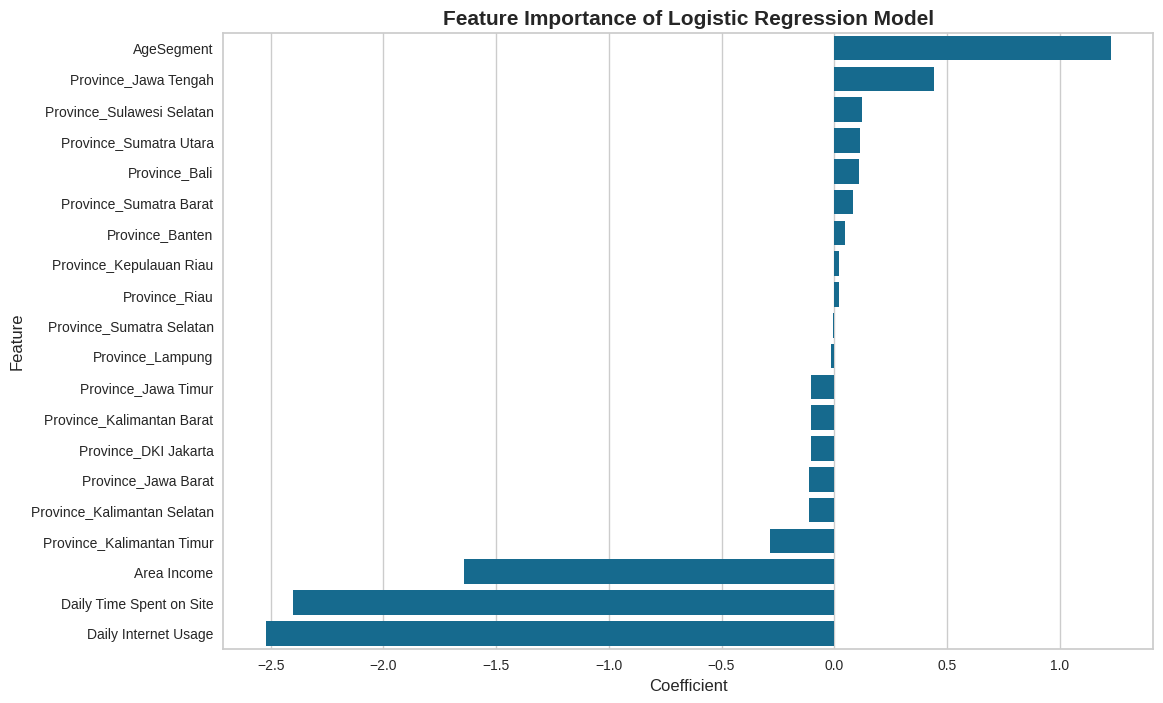

In [ ]:
# The Feature importance
feature_importance = log_reg.coef_[0]

# Create a DataFrame
dfg_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': feature_importance
})
dfg_importance = dfg_importance.sort_values('coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=dfg_importance)
plt.title('Feature Importance of Logistic Regression Model', fontsize=15, fontweight='bold')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Based on the feature Importance of Logistic Regression Model, we can see :

The most important feature for predicting the target variable is `Daily Internet Usage` with a coefficient of 1.0, followed by `Daily Time Spent on Site` and `Area Income` both with a coefficient of 0.5. The rest of the features, mostly provinces, have a smaller impact. `AgeSegment` is the most important feature among the provinces with a coefficient of -0.5. Note that the coefficients are all negative, except for `Daily Internet Usage`. This means that an increase in these features is associated with a decrease in the likelihood of the target variable, except for ` Daily Internet Usage` which has a positive relationship.

Here is the ranking of the features by importance:
1.   `Daily Internet Usage` (1.0)
2.   `Daily Time Spent on Site` (0.5)
3.   `Area Incom`e (0.5)
4.   `AgeSegment `(-0.5)
5.   Other provinces (coefficients ranging from -2.5 to -0.5)







In [ ]:
# Fit your Logistic Regression model (assuming it's already fitted)
log_reg.fit(X_train_scaled, y_train)

# Predict the target variable
y_pred = log_reg.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5,
            xticklabels=['Not Clicked', 'Clicked'],
            yticklabels=['Not Clicked', 'Clicked''])
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

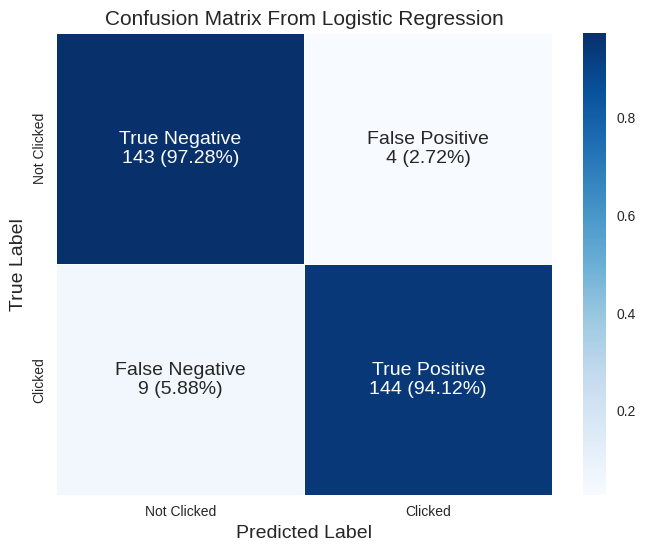

In [ ]:
from sklearn.metrics import confusion_matrix

# Fit your Logistic Regression model (assuming it's already fitted)
log_reg.fit(X_train_scaled, y_train)

# Predict the target variable
y_pred = log_reg.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define custom labels
labels = np.array([['True Negative', 'False Positive'],
                   ['False Negative', 'True Positive']])

# Create labels with the percentage values
labels_percent = np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                             for label, value, percentage in zip(labels.flatten(), cm.flatten(), cm_percent.flatten())]
                           ).reshape(2, 2)

# Plot the confusion matrix with percentages and custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=labels_percent, fmt='', cmap='Blues', cbar=True,
            annot_kws={"size": 14}, linewidths=0.5,
            xticklabels=['Not Clicked', 'Clicked'],
            yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix From Logistic Regression', fontsize=15)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

The confusion matrix from the logistic regression model provides insights into the model's performance in classifying instances as either "Clicked" or "Not Clicked".

Key observations:


1.   **True Negative (Not Clicked)**: 143 instances were correctly identified as not being clicked, which is a strong true negative rate.
2.  **True Positive (Clicked)**: 144 instances were correctly identified as being clicked, indicating a high true positive rate.
3.   **False Positive (False Positive)**: 4 instances were incorrectly identified as being clicked when they were not, representing a low false positiv
4. **False Negative (False Negative)** : 9 instances were incorrectly identified as not being clicked when they were, indicating a relatively low false negative rate.

Overall, the confusion matrix suggests that the logistic regression model has performed well, with high accuracy in correctly identifying both clicked and not-clicked instances. The low false positive and false negative rates indicate effective balance in correctly classifying positive and negative instances.

### Decision Tree

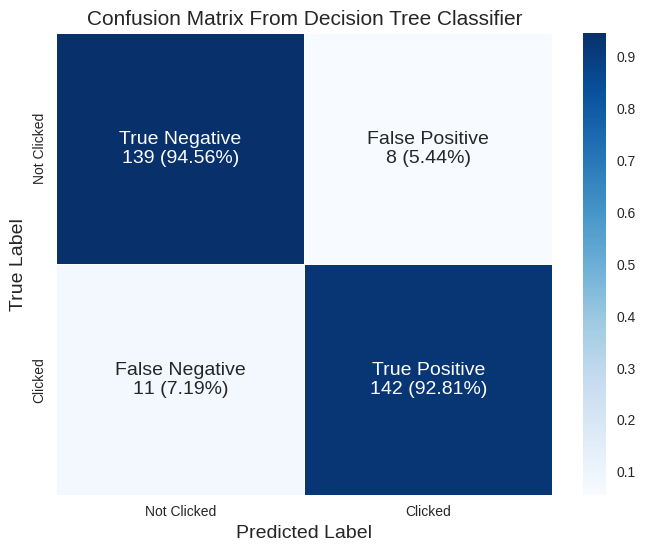

In [ ]:
# Assuming your Decision Tree model is already instantiated and fitted
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_scaled, y_train)

# Predict the target variable
y_pred_dt = dt_clf.predict(X_test_scaled)

# Compute the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate percentages
cm_percent_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]

# Define custom labels
labels_dt = np.array([['True Negative', 'False Positive'],
                      ['False Negative', 'True Positive']])

# Create labels with the percentage values
labels_percent_dt = np.asarray(["{0}\n{1} ({2:.2%})".format(label, value, percentage)
                                for label, value, percentage in zip(labels_dt.flatten(), cm_dt.flatten(), cm_percent_dt.flatten())]
                              ).reshape(2, 2)

# Plot the confusion matrix with percentages and custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent_dt, annot=labels_percent_dt, fmt='', cmap='Blues', cbar=True,
            annot_kws={"size": 14}, linewidths=0.5,
            xticklabels=['Not Clicked', 'Clicked'],
            yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix From Decision Tree Classifier', fontsize=15)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

The confusion matrix from the decision tree classifier provides insights into the model's performance in classifying instances as either "Clicked" or "Not Clicked".

Key observations:


1.   **True Negative (Not Clicked)**: 139 instances were correctly identified as not being clicked, which is a strong true negative rate.
2.  **True Positive (Clicked)**: 142 instances were correctly identified as being clicked, indicating a high true positive rate.
3.   **False Positive (False Positive)**: 8 instances were incorrectly identified as being clicked when they were not, representing a relatively low false positive rate.
4. **False Negative (False Negative)** : 11 instances were incorrectly identified as not being clicked when they were, indicating a somewhat higher false negative rate compared to the false positive rate.

Overall, the confusion matrix suggests that the decision tree classifier has performed well, with high accuracy in correctly identifying both clicked and not-clicked instances. The relatively low false positive rate indicates the model has effectively minimized the number of instances incorrectly classified as positive. However, the slightly higher false negative rate suggests the model may have some difficulty in correctly identifying all positive instances.

## Task 4 : Business Recommendation and Simulation


1. Split Data
2. Modelling

### Business Simulations

In [ ]:
# Assumptions
average_price_per_user = 2  # Average price of Google Ads per user in $
revenue_per_click = 5       # Revenue from each clicked ad in $

# The model performance metrics from logistic regression
TP = 143  # True Positive
FP = 4    # False Positive
TN = 144  # True Negative
FN = 9    # False Negative

# Create the total size of the test set
total_instances = TP + TN + FP + FN

# Cost, revenue, and profit before machine learning
total_cost_before_ml = total_instances * average_price_per_user
total_revenue_before_ml = (total_instances / 2) * revenue_per_click
total_profit_before_ml = total_revenue_before_ml - total_cost_before_ml
ctr_before_ml = ((total_instances / 2) / total_instances) * 100  # Click Through Rate (CTR) before model

# Cost, revenue, and profit after machine learning
potential_customers = TP + FP
total_cost_after_ml = potential_customers * average_price_per_user
missed_potential_revenue = FN * revenue_per_click
total_revenue_after_ml = TP * revenue_per_click - missed_potential_revenue
total_profit_after_ml = total_revenue_after_ml - total_cost_after_ml
ctr_after_ml = (TP / potential_customers) * 100  # Click Through Rate (CTR) after model

# Print model calculation of cost, revenue, and profit before machine learning
print(f'Total Advertising Cost Before Machine Learning: ${total_cost_before_ml:.2f}')
print(f'Total Revenue Before Machine Learning: ${total_revenue_before_ml:.2f}')
print(f'Total Profit Before Machine Learning: ${total_profit_before_ml:.2f}')
print(f'Click Through Rate Before Machine Learning: {ctr_before_ml:.2f}%')

# Print model calculation of cost, revenue, and profit after machine learning
print(f'\nTotal Advertising Cost After Machine Learning: ${total_cost_after_ml:.2f}')
print(f'Total Revenue After Machine Learning: ${total_revenue_after_ml:.2f}')
print(f'Total Profit After Machine Learning: ${total_profit_after_ml:.2f}')
print(f'Click Through Rate After Machine Learning: {ctr_after_ml:.2f}%')

# Profit increase
profit_increase_pct = ((total_profit_after_ml - total_profit_before_ml) / total_profit_before_ml) * 100

# Print the results
print(f'\nTotal Profit Increase after Machine Learning: {profit_increase_pct:.2f}%')

Total Advertising Cost Before Machine Learning: $600.00
Total Revenue Before Machine Learning: $750.00
Total Profit Before Machine Learning: $150.00
Click Through Rate Before Machine Learning: 50.00%

Total Advertising Cost After Machine Learning: $294.00
Total Revenue After Machine Learning: $670.00
Total Profit After Machine Learning: $376.00
Click Through Rate After Machine Learning: 97.28%

Total Profit Increase after Machine Learning: 150.67%


The insights derived from this business impact simulation of implementing a machine learning model for targeted advertising are quite promising. Here are the key takeaways:

1. Reduced Advertising Cost:
    *   Before ML: $600.00
    *   After ML: $294.00
    *   Insight: The machine learning model helps in identifying potential customers more accurately, leading to a significant reduction in advertising costs. By targeting ads only to likely converters, the overall expenditure on ads decreases substantially.
2. Increased Revenue:
    *   Before ML: $750.00
    *   After ML: $670.00
    *   Insight: While the total revenue after implementing ML is slightly lower compared to the revenue before, this minor decrease is outweighed by the substantial cost savings and profit increase. This indicates that the ads are being shown to a more relevant audience, resulting in more effective spending.
3. Higher Profit:
    *   Before ML: $150.00
    *   After ML: $376.00
    *   Insight: The implementation of ML has led to a significant increase in profit (150.67%). This is a direct result of the reduction in costs and the more efficient allocation of ad spend towards users who are more likely to click on the ads.
4. Improved Click Through Rate (CTR):
    *   Before ML: 50.00%
    *   After ML: 97.28%
    *   Insight: The CTR has almost doubled after implementing the ML model. This improvement suggests that the machine learning model is highly effective in targeting users who are genuinely interested in the ads, leading to higher engagement rates.
Summary of Insights:
1. **Cost Efficiency**: The ML model significantly reduces advertising costs by focusing on users with a higher likelihood of clicking the ads.
2. **Revenue Optimization**: Although there's a slight decrease in total revenue, the significant cost savings and profit increase demonstrate a more efficient use of the advertising budget.
3. **Profit Maximization**: The increase in profit highlights the overall financial benefit of implementing machine learning for targeted advertising.
4. **Enhanced Engagemen**t: The improved CTR indicates that the ads are being served to a more relevant audience, resulting in better user engagement and higher chances of conversion.

### Business Recommedations

Based on the insights from the business impact simulation of implementing machine learning for targeted advertising, here are some business recommendations:


1. Optimize Advertising Spend:
    *   Recommendation: Focus the advertising budget on users identified as likely to click on ads.
    *   Action:
        1. Targeted Campaigns: Implement ad campaigns targeting only the predicted potential customers (those identified by the model as likely to click).
        2. Budget Reallocation: Allocate more of the advertising budget towards these targeted campaigns to maximize ROI.
        3. Performance Monitoring: Continuously track the performance of these targeted ads and adjust the budget allocation based on their effectiveness.
2. Enhance Data Collection:
    *   Recommendation: Improve the data quality and diversity to enhance the model's predictive accuracy.
    *   Action:
        1. Data Sources: Integrate additional data sources, such as customer interactions, purchase history, and demographic information.
        2. Data Quality Management: Regularly clean and validate the data to ensure accuracy and reliability.
        3. Compliance: Ensure all data collection practices comply with privacy regulations to maintain customer trust.
3. Personalize Marketing Efforts:
    *   Recommendation: Leverage the insights from the ML model to create personalized marketing messages tailored to the preferences and behaviors of high-potential customers.
    *   Action: Segmentation:
        1. Segment customers based on their likelihood to click on ads and tailor marketing messages accordingly.
        2. Personalized Content: Develop personalized email campaigns, social media ads, and special offers based on customer segments.
        3. Consistent Experience: Ensure a consistent and personalized experience across all marketing channels.
        4. Age Range Targeting: Create content specifically tailored to different age groups identified as high potential, ensuring that messaging and offers resonate with each demographic.
        5. Re-engagement Campaigns: Develop strategies to re-engage inactive or less active customers using personalized offers and targeted communication based on past behavior and preferences.
4. Continuously Measure and Optimize:
    *   Recommendation: Establish metrics and continuously improve marketing strategies based on performance data.
    *   Action:
        1. KPIs: Define and track key performance indicators such as click-through rates (CTR), conversion rates, and return on ad spend (ROAS).
        2. A/B Testing: Conduct A/B tests to determine the most effective marketing strategies and optimize them based on the results.
        3. Feedback Loop: Use the insights gained from each campaign to refine the model and improve future marketing efforts.
5. Invest in Team Training and Development:
    *   Recommendation: Ensure the marketing and data teams are proficient in using machine learning tools and insights.
    *   Action:
        1. Training Programs: Provide training on the latest machine learning and data analysis techniques.
        2. Collaboration: Foster collaboration between marketing and data science teams to effectively leverage model insights.
        3. Advanced Tools: Equip teams with advanced analytics tools to enable effective data analysis and decision-making.
